

---


Возьмём холодную часть как Мурнагана (1) и Бёрча-Мурнагана 3-го порядка (2) и Роуза-Вине (3)

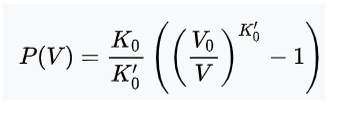
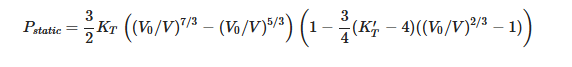
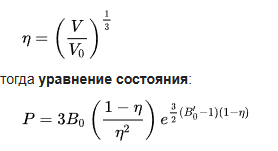

C:\Temp\ipykernel_7976\901294140.py:35: RuntimeWarning: invalid value encountered in divide
  return np.where(x!=0, x**4 * np.exp(x) / (np.exp(x) - 1)**2, 0)


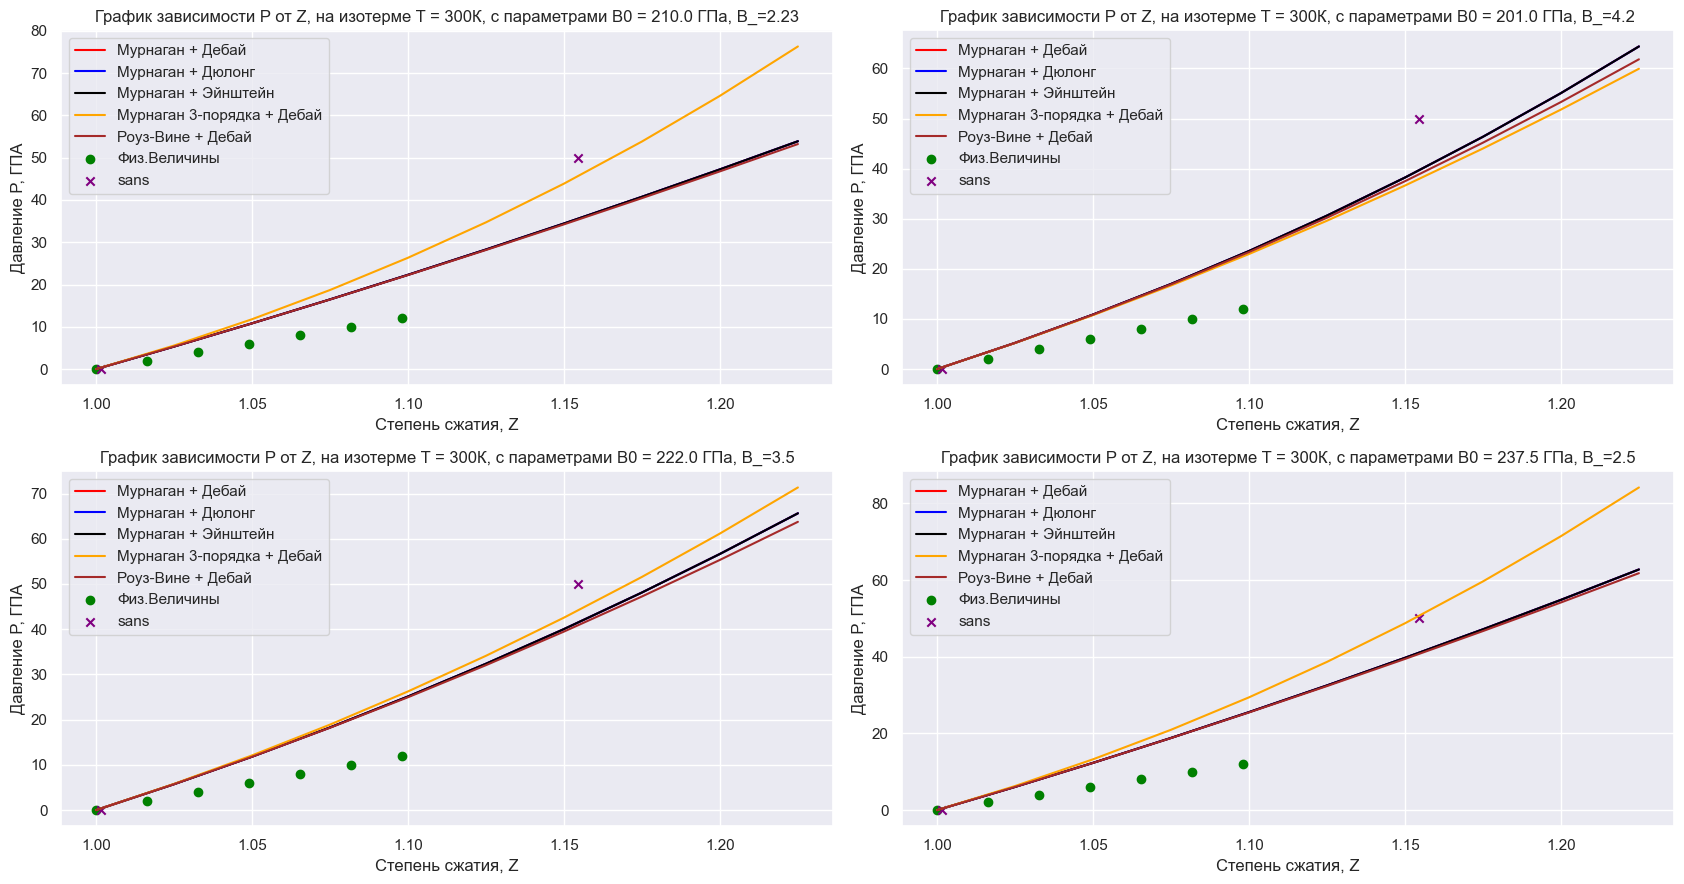

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

sns.set_theme()
plt.figure(figsize=(17, 9))

class PhysicsConstant:
    """This class defines Physical Constant used in this task"""
    teta = 1250
    R = 8.31
    gamma = 1.67 #2
    h_ = 6.625 * 10**(-34) # Дж*c Постоянная планка
    kb = 1.38 * 10**(-23) # Дж/K Постоянная Больцмана
    omega = 10**(13) # Рад/c ОЦЕНОЧНОЕ ЧИСЛО

class P_value:
    """"This class required to calculate <Cold> component of Pressure"""


    def __init__(self, T, K, K_, place):
        self.T = T
        self.Cv = self.calc_Cv()
        self.CvEinst = self.calc_CvEinst()
        self.K = K * 10**(9)
        self.K_ = K_
        self.place = place

        self.z = np.arange(1.0, 1.25, 0.025)
        self.V = np.linspace(2.34, 2.808, 10)

    @staticmethod
    def func(x):
        return np.where(x!=0, x**4 * np.exp(x) / (np.exp(x) - 1)**2, 0)

    def calc_Cv(self):
        ot = self.T / PhysicsConstant.teta
        d = 1 / ot
        m = 500
        c = 0
        h = (d - c) / (2 * m)
        x = c + h * np.arange(0, 2 * m + 1)
        y = self.func(x)
        integral = h / 3 * (4 * np.sum(y[1::2]) + 2 * np.sum(y[2:2*m-1:2]) + y[0] + y[-1])
        return 9 * PhysicsConstant.R * ot**3 * integral

    def calc_CvEinst(self):
        return(3 * PhysicsConstant.R * (PhysicsConstant.teta/self.T)**(2) * math.exp(PhysicsConstant.teta/self.T)/(math.exp(PhysicsConstant.teta/self.T) - 1)**2)

    def P_Debay(self):
        return self.K / self.K_ * ((self.z)**(self.K_) - 1) + self.Cv * PhysicsConstant.gamma / self.V

    def P_Dulong(self):
        return self.K / self.K_ * ((self.z)**(self.K_) - 1) + 3 * PhysicsConstant.R * PhysicsConstant.gamma / self.V

    def P_Einst(self):
        return self.K / self.K_ * ((self.z)**(self.K_) - 1) + self.CvEinst * PhysicsConstant.gamma / self.V

    def P_Murn3(self):
        return 3 / 2 * self.K * ((self.z)**(7 / 3) - (self.z)**(5 / 3)) * (1 - 3 / 4 * (self.K_ - 4)*((self.z)**(2 / 3) - 1)) + self.Cv * PhysicsConstant.gamma / self.V #Мурнаган + Дебай

    def P_Vine(self):
        eta = (1/self.z)**(1/3)
        return 3 * self.K * (1-eta)/(eta**2) * np.exp(3/2 * (self.K_ - 1) * (1 - eta)) + self.Cv * PhysicsConstant.gamma / self.V

    def plot(self):
        P_deb = self.P_Debay()
        P_dul = self.P_Dulong()
        P_Ein = self.P_Einst()
        P_Mur = self.P_Murn3()
        P_vine = self.P_Vine()

        plt.subplot(2, 2, self.place)
        plt.plot(self.z, P_deb/10**9, label='Мурнаган + Дебай', color='red')
        plt.plot(self.z, P_dul/10**9, label='Мурнаган + Дюлонг', color='blue')
        plt.plot(self.z, P_Ein/10**9, label='Мурнаган + Эйнштейн', color='black')
        plt.plot(self.z, P_Mur/10**9, label='Мурнаган 3-порядка + Дебай', color='orange')
        plt.plot(self.z, P_vine/10**9, label="Роуз-Вине + Дебай", color="brown")

        P_phys = [0.05, 2, 4, 6, 8, 10, 12] # Физические Величины
        plt.scatter(np.linspace(1.0, 1.098, len(P_phys)), P_phys, color='green', label='Физ.Величины', marker='o')
        plt.grid(True)
        P_sans = [0, 50] #100
        V_sans = [1.001724234, 1.154487179] # sans  1.420907298
        plt.scatter(V_sans, P_sans, color='purple', label='sans', marker='x')
        plt.title(f'График зависимости P от Z, на изотерме T = {self.T}К, с параметрами B0 = {self.K/10**9} ГПа, B_={self.K_}')
        plt.xlabel('Степень сжатия, Z')
        plt.ylabel('Давление P, ГПА')
        plt.legend()
        plt.tight_layout()
        plt.savefig(f'{self.T}.png')

"""
    def isoBarical(self):
        eta = (1/self.z)**(1/3)
        return 3 * self.K * (1-eta)/(eta**2) * np.exp(3/2 * (self.K_ - 1) * (1 - eta)) + self.CvEinst * PhysicsConstant.gamma / self.V
    
    def calculate_isobar(self):
        l = 0
        r = 5000
        if isoBarical()
"""

P_300 = P_value(300, K=210, K_=2.23, place=1)
P_300.plot()
P_300_params2 = P_value(300, K=201, K_= 4.2, place=2)
P_300_params2.plot()
P_300_params3 = P_value(300, K=222, K_= 3.5, place=3)
P_300_params3.plot()
P_300_params4 = P_value(300, K=237.5, K_=2.5, place=4)
P_300_params4.plot()

---
#КАЛЛОРИКА


image.png
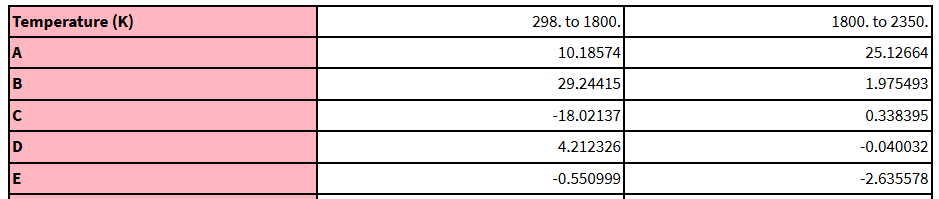

C:\Temp\ipykernel_7976\3294051961.py:18: RuntimeWarning: invalid value encountered in divide
  return np.where(x!=0, x**4*np.exp(x)/(np.exp(x)-1)**2, 0)


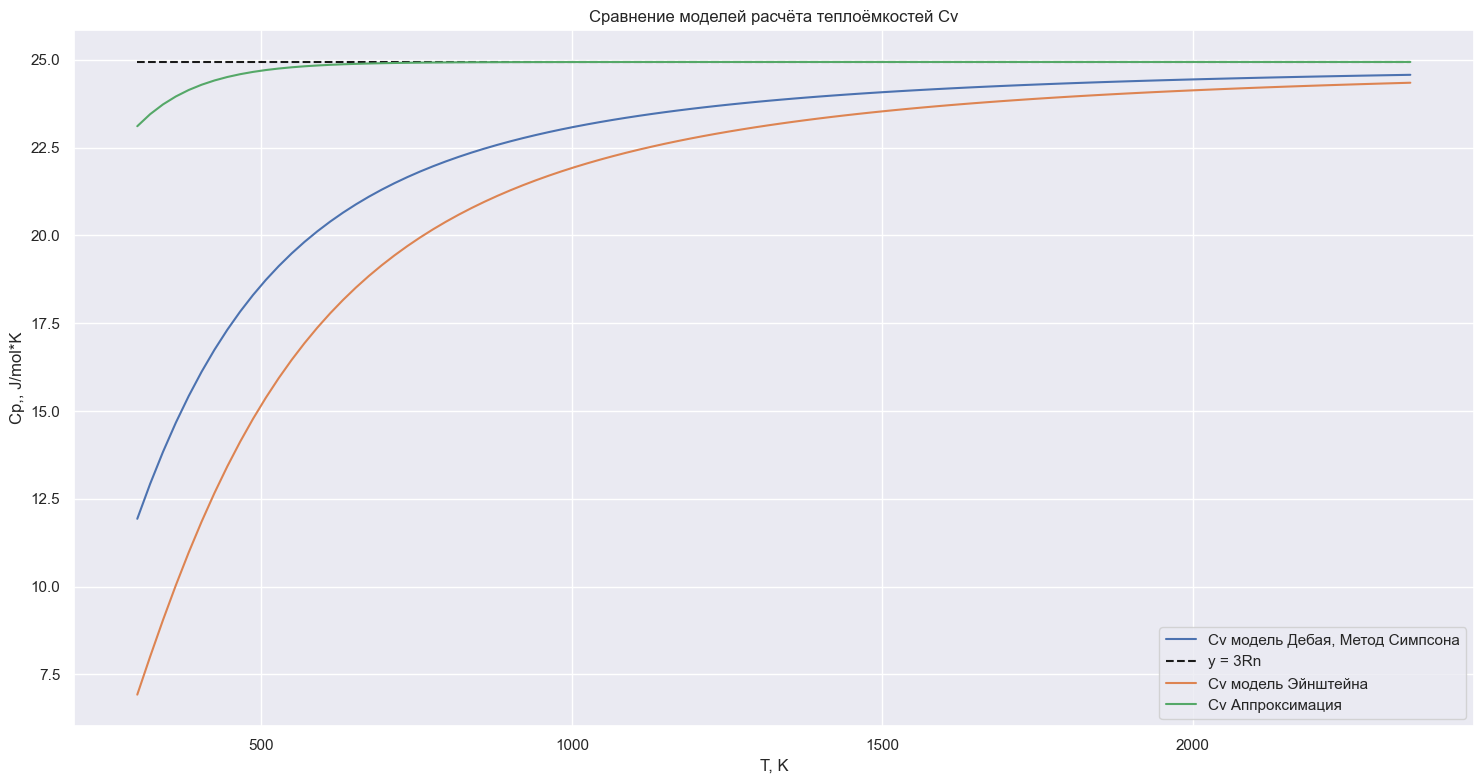

In [23]:
class PhysicsConstant:
    """This class defines Physical Constant used in this task"""
    teta = 1250
    R = 8.31
    gamma = 1.67 #2
    h_ = 6.625 * 10**(-34) # Дж*c Постоянная планка
    kb = 1.38 * 10**(-23) # Дж/K Постоянная Больцмана
    omega = 10**(13) # Рад/c ОЦЕНОЧНОЕ ЧИСЛО
    
class CompareCalloricalProperties:
    """This class required to compare different models which calculate Heat Capacity"""

    def __init__(self):
        self.t = np.linspace(300, 2350, 100)

    @staticmethod
    def func(x):
        return np.where(x!=0, x**4*np.exp(x)/(np.exp(x)-1)**2, 0)
    
    
    def Debay_Heat_Capacity(self):
        Cv_Debay = []
        m = 50
        c = 0
        for t in self.t:
            z= t / PhysicsConstant.teta
            d=1/z
            h=(d-c)/2/m
            x=c+h*np.arange(0, 2*m)
            y=self.func(x)
            integral=h/3*(4*np.sum(y[1::2])+2*np.sum(y[2:2*m-1:2])+y[0]+y[-1])
            Cv_Debay.append(9 * PhysicsConstant.R * z**3 * integral)
        Cv_Debay = np.array(Cv_Debay)
        return Cv_Debay
    
    def Einstein_Heat_capacity(self):
        Cp_Einst = []
        for T in self.t:
            Cp_Einst.append(3 * PhysicsConstant.R * (PhysicsConstant.teta/T)**(2) * math.exp(PhysicsConstant.teta/T)/(math.exp(PhysicsConstant.teta/T) - 1)**2)
        return Cp_Einst

    def Polinomial_eq_nist(self):
        Cp_nist = []
        for t in self.t:
            if t <= 1800:
                Cp_nist.append(10.18574 + 29.24415 * (t*0.001) - 18.02137 * (t*0.001)**2 + 4.212326 * (t*0.001)**3 - 0.550999 / (t*0.001)**2)
            if t >= 1801 and t <= 2350:
                Cp_nist.append(25.12664 + 1.975493 * (t*0.001) + 0.338395 * (t*0.001)**2 - 0.040032 *(t*0.001)**3 - 2.635578 / (t*0.001)**2)
        Cp_nist = np.array(Cp_nist)
        return Cp_nist

    def Approximation_exp_data(self):
        approx_values = []
        for T in self.t:
            approx_values.append(24.942 * (1 - (math.exp(-(T - 199.90)/99.82))/5))
        return approx_values


    def plot_data(self):
        assipt = np.linspace(300, 2350, 100)
        y_asymptote = 24.93 * np.ones_like(assipt)
        plt.figure(figsize=(15, 8))
        plt.grid(True)
        plt.plot(self.t, self.Debay_Heat_Capacity(), label='Сv модель Дебая, Метод Симпсона')
        #plt.plot(self.t, self.Polinomial_eq_nist(), label='Cp Нист')
        plt.plot(assipt, y_asymptote, 'k--', label='y = 3Rn')
        plt.plot(self.t, self.Einstein_Heat_capacity(), label='Cv модель Эйнштейна')
        plt.plot(self.t, self.Approximation_exp_data(), label="Cv Аппроксимация")
        plt.legend()
        plt.xlabel('T, K')
        plt.ylabel('Cp,, J/mol*K')
        plt.title('Сравнение моделей расчёта теплоёмкостей Cv')
        plt.tight_layout()
        plt.savefig('Cv.png')

compare_1 = CompareCalloricalProperties()
compare_1.plot_data()

image.png
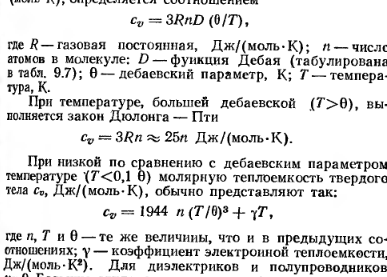
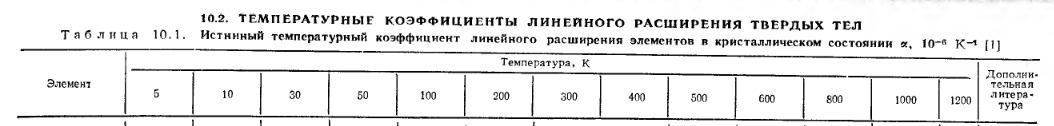
image.png

---
АПРОКСИМАЦИЯ ТЕПЛОЁМКОСТИ НЕЛИНЕЙНОЙ РЕГРЕССИЕЙ И ГРАДЕНТНЫМ СПУСКОМ

---




Оптимальные параметры: A = 199.89971256078152 , B = 99.82074453935239
Коэффициент детерминации R² = 0.9975


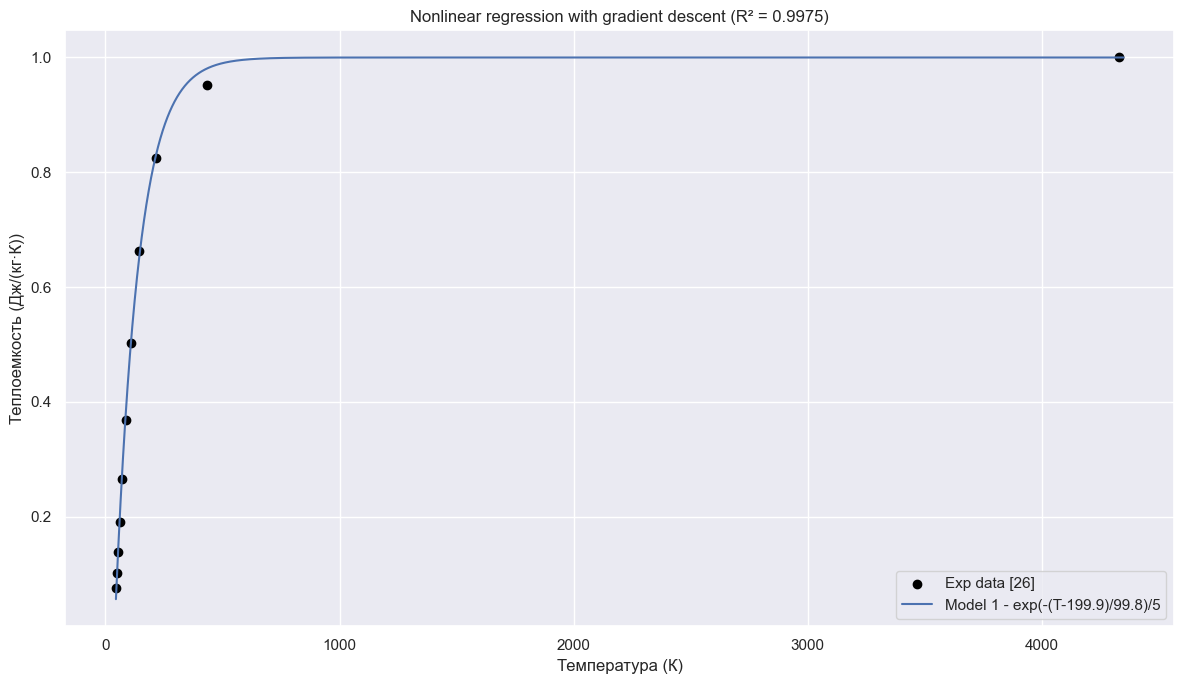

In [24]:
import numpy as np
import matplotlib.pyplot as plt

class GradientDescentNonlinearRegression:
    def __init__(self, learning_rate=0.015, iterations=150000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.X = np.array([])
        self.Y = np.array([])
        self.A = 0
        self.B = 0

    def plot_data(self):
        plt.figure(figsize=(12,7))

        plot_data = []
        for T in range(45, 4350):
            plot_data.append(1 - np.exp(-(T - self.A) / self.B) / 5)

        #plt.style.use('fivethirtyeight')
        plt.scatter(self.X, self.Y, color='black', label='Exp data [26]')
        plt.plot(range(45, 4350), plot_data, label=f"Model 1 - exp(-(T-{self.A:.1f})/{self.B:.1f})/5")
        plt.xlabel('Температура (К)')
        plt.ylabel('Теплоемкость (Дж/(кг·К))')
        r2_score = self.calculate_r2()
        plt.title(f'Nonlinear regression with gradient descent (R² = {r2_score:.4f})')
        plt.legend()
        plt.tight_layout()
        plt.savefig('descent.png')

    def save_data(self):
        np.savez('FirstDataSet.npz', array1=self.X, array2=self.Y)

    def generate_data(self):
        self.X = np.array([4330.0, 433.0, 216.5, 144.3, 108.3, 86.6, 72.2, 61.9, 54.1, 48.1, 43.3])       # Температура в К
        self.Y = np.array([1, 0.952, 0.825, 0.663, 0.503, 0.369, 0.266, 0.191, 0.138, 0.101, 0.076])
             # Экспериментальная теплоёмкость в Дж/(кг·К)
    def calculate_r2(self):
            y_pred = self.predict()
            ss_total = np.sum((self.Y - np.mean(self.Y)) ** 2)
            ss_residual = np.sum((self.Y - y_pred) ** 2)
            r2 = 1 - (ss_residual / ss_total)
            return r2
    
    def fit(self):
        self.A = 200
        self.B = 100
        n = self.X.shape[0]

        for _ in range(self.iterations):
            A_gradient = -2 * np.sum((self.Y - (1 - np.exp(-(self.X - self.A) / self.B) / 5)) * (-np.exp(-(self.X - self.A) / self.B) / (5 * self.B))) / n
            B_gradient = -2 * np.sum((self.Y - (1 - np.exp(-(self.X - self.A) / self.B) / 5)) * ((self.X - self.A) * np.exp(-(self.X - self.A) / self.B) / (5 * self.B**2))) / n

            self.A -= self.learning_rate * A_gradient
            self.B -= self.learning_rate * B_gradient

        r2_score = self.calculate_r2()
        print("Оптимальные параметры: A =", self.A, ", B =", self.B)
        print(f"Коэффициент детерминации R² = {r2_score:.4f}")

    def predict(self):
        return (1 - np.exp(-(self.X - self.A) / self.B) / 5)

clf = GradientDescentNonlinearRegression()
clf.generate_data()
clf.fit()
clf.plot_data()


<>:9: SyntaxWarning: invalid escape sequence '\G'
<>:9: SyntaxWarning: invalid escape sequence '\G'
C:\Temp\ipykernel_7976\2435046266.py:9: SyntaxWarning: invalid escape sequence '\G'
  self.boron_data = pd.read_csv("D:\Git\RepoMALEKWHAT\MEPhI.-SCIENCE\data\BoronExp.txt", sep="\t")


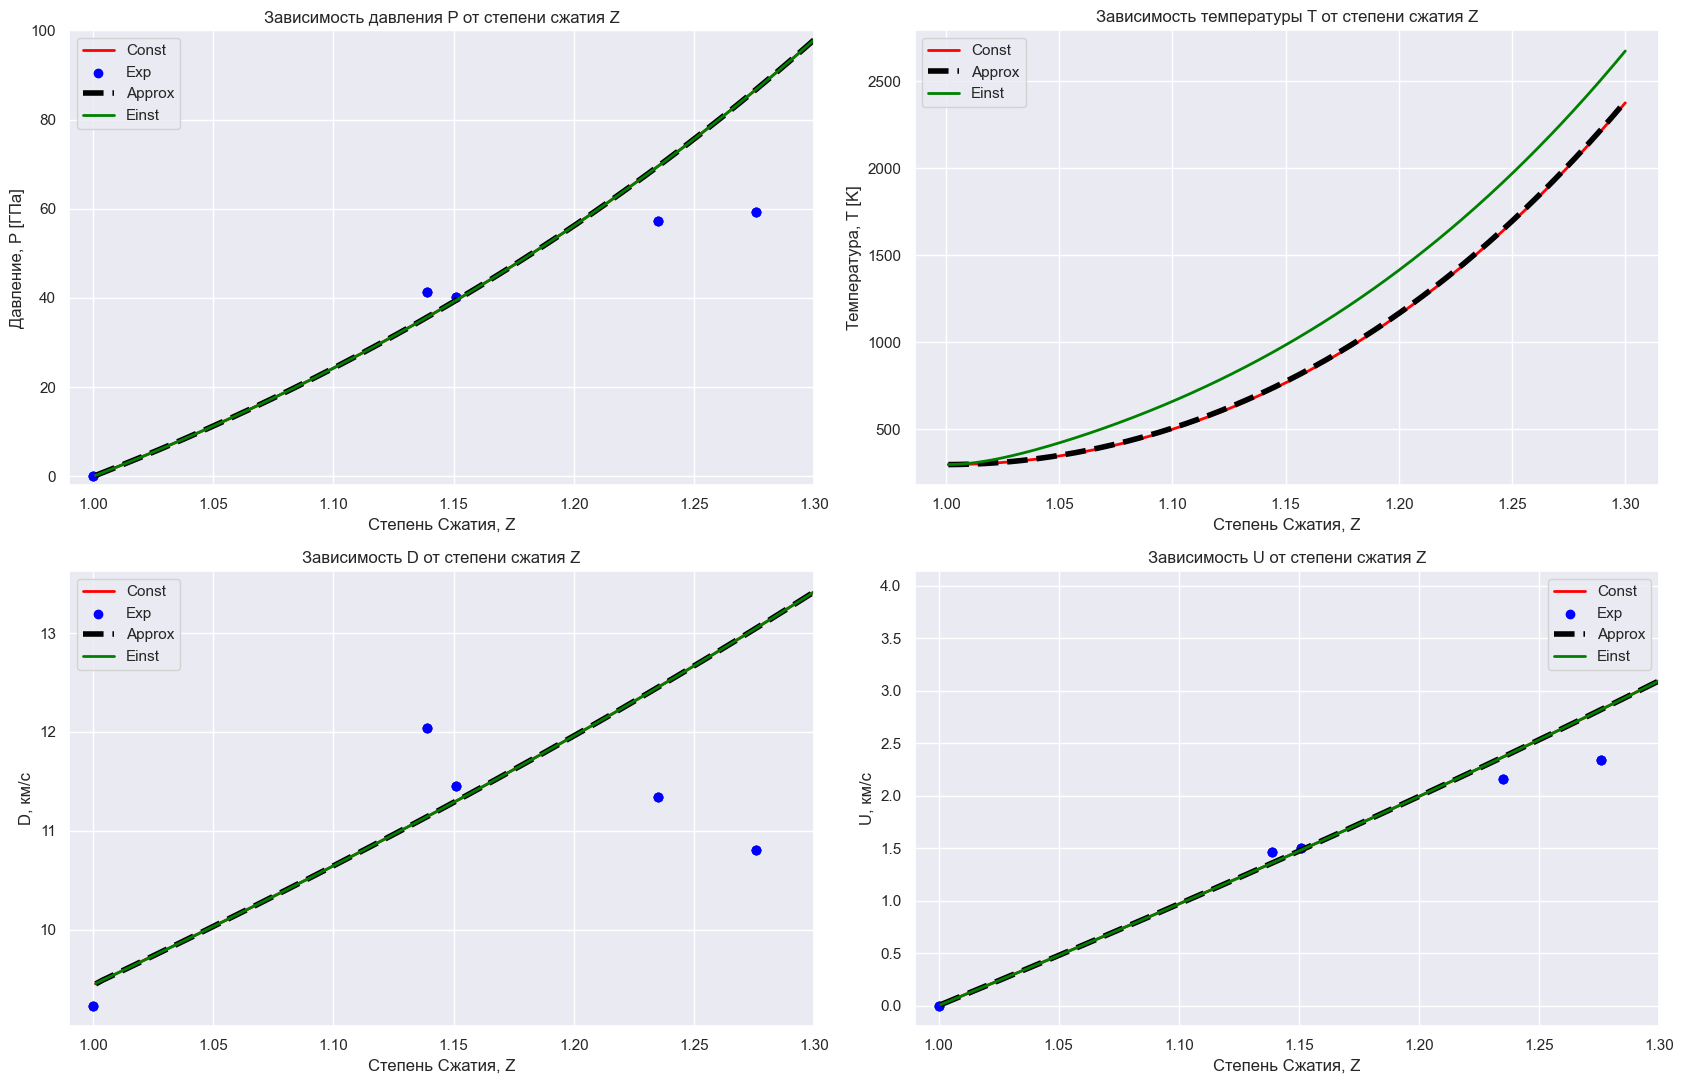

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
import pandas as pd

class BoronModel:
    def __init__(self):
        self.boron_data = pd.read_csv("D:\Git\RepoMALEKWHAT\MEPhI.-SCIENCE\data\BoronExp.txt", sep="\t")
        self.V1 = 4.59 / 1000  # литры
        self.P1 = 100  # кПа
        self.m = 10.81 / 1000  # кг/моль
        self.K = 210 * 10**9  # Па
        self.K_ = 2.23
        self.gamma = 1.67
        self.T1 = 298.15  # K

    def PdV(self, T, Z):
        V2 = self.V1 / Z
        return 0.5 * (self.V1 - V2) * (self.P2(T, Z) + self.P1)

    def P2(self, T, Z):
        eta = (1 / Z) ** (1 / 3)
        V0_m3_mol = self.V1 / 1000.0
        V2_m3_mol = V0_m3_mol / Z

        P_cold = 3 * self.K * (1 - eta) / (eta**2) * np.exp(1.5 * (self.K_ - 1) * (1 - eta))
        E_thermal_integral = self.calc_E_thermal(T, Z)
        P_thermal = self.gamma / V2_m3_mol * E_thermal_integral
        P_total_Pa = P_cold + P_thermal
        return (P_total_Pa / 1000.0) + self.P1  # кПа

    def Ecold(self, Z):
        eta = (1 / Z) ** (1 / 3)
        exp_arg = 1.5 * (self.K_ - 1) * (1 - eta)
        exp_val = np.exp(exp_arg)
        coeff = (4.0 * self.K * (self.V1 / 1000000.0)) / (self.K_ - 1)**2
        energy_term = 1.0 - (1.0 - exp_arg) * exp_val
        return coeff * energy_term

    def calc_E_thermal(self, T, Z):
        raise NotImplementedError("This method should be implemented in child classes.")

    def dE(self, T, Z):
        return self.Ecold(Z) + self.calc_E_thermal(T, Z)

    def func(self, T, Z):
        return self.dE(T, Z) - self.PdV(T, Z)

    def res(self, Z, diff=0.1):
        left, right = 298.0, 8000.0
        f_left, f_right = self.func(left, Z), self.func(right, Z)

        for _ in range(100):
            mid = (left + right) / 2
            if mid == left or mid == right or (right - left) < diff:
                break
            f_mid = self.func(mid, Z)
            if abs(f_mid) < 1e-7:
                return mid
            if f_mid * f_left < 0:
                right = mid
            else:
                left = mid
                f_left = f_mid
        return (left + right) / 2

    def run_simulation(self, Z_range=np.arange(1.001, 1.3, 0.001)):
        T_values, Z_values, P2_values, D_values, U_values = [], [], [], [], []

        for Z in Z_range:
            T2 = self.res(Z)
            if np.isnan(T2):
                continue

            current_P2_kPa = self.P2(T2, Z)
            P2_minus_P1_kPa = current_P2_kPa - self.P1
            term_for_DU = (P2_minus_P1_kPa * 1000.0) * (self.V1 / 1000.0 / self.m) / (1.0 - 1.0 / Z)
            D_val = np.sqrt(term_for_DU) / 1000.0
            U_val = (Z - 1.0) / Z * D_val

            T_values.append(T2)
            Z_values.append(Z)
            P2_values.append(current_P2_kPa / 1000000.0)
            D_values.append(D_val)
            U_values.append(U_val)

        return Z_values, P2_values, D_values, U_values, T_values

class ConstCv(BoronModel):
    def calc_E_thermal(self, T, Z):
        Cv = 24.93
        return Cv * (T - self.T1)

class ApproxCv(BoronModel):
    def approx(self, T):
        return 24.93 * (1 - (math.exp(-(T - 199.90) / 99.825)) / 5)

    def calc_E_thermal(self, T, Z):
        return integrate.quad(self.approx, self.T1, T)[0]

class EinstCv(BoronModel):
    def calc_CvEinst(self, T):
        R = 8.31
        teta = 1250
        return (3 * R * (teta / T)**2 * math.exp(teta / T) / (math.exp(teta / T) - 1)**2)

    def calc_E_thermal(self, T, Z):
        return integrate.quad(self.calc_CvEinst, self.T1, T)[0]

def plot_all_results(models, labels, Z_range=np.arange(1.001, 1.3, 0.001)):
    plt.figure(figsize=(17, 11))

    line_styles = [
        {"color": "red", "linewidth": 2, "linestyle": "-", "label": "Const"},
        {"color": "black", "linewidth": 4, "linestyle": "--", "label": "Approx"},
        {"color": "green", "linewidth": 2, "linestyle": "-", "label": "Einst"}
    ]

    for model, style in zip(models, line_styles):
        Z_values, P2_values, D_values, U_values, T_values = model.run_simulation(Z_range)

        plt.subplot(2, 2, 1)
        plt.plot(Z_values, P2_values, **style)
        plt.scatter(model.boron_data["R/R0"], model.boron_data["P"], label="Exp" if style == line_styles[0] else None, color="blue")
        plt.grid(True)
        plt.legend()
        plt.ylim(-2, 100)
        plt.xlim(0.99, 1.3)
        plt.title("Зависимость давления P от степени сжатия Z")
        plt.xlabel('Степень Сжатия, Z')
        plt.ylabel('Давление, P [ГПа]')

        plt.subplot(2, 2, 2)
        plt.plot(Z_values, T_values, **style)
        plt.grid(True)
        plt.legend()
        plt.title("Зависимость температуры T от степени сжатия Z")
        plt.xlabel('Степень Сжатия, Z')
        plt.ylabel('Температура, T [K]')

        plt.subplot(2, 2, 3)
        plt.plot(Z_values, D_values, **style)
        plt.scatter(model.boron_data["R/R0"], model.boron_data["D"], label="Exp" if style == line_styles[0] else None, color="blue")
        plt.grid(True)
        plt.legend()
        plt.xlim(0.99, 1.3)
        plt.title("Зависимость D от степени сжатия Z")
        plt.xlabel('Степень Сжатия, Z')
        plt.ylabel('D, км/с')

        plt.subplot(2, 2, 4)
        plt.plot(Z_values, U_values, **style)
        plt.scatter(model.boron_data["R/R0"], model.boron_data["U"], label="Exp" if style == line_styles[0] else None, color="blue")
        plt.grid(True)
        plt.legend()
        plt.xlim(0.99, 1.3)
        plt.title("Зависимость U от степени сжатия Z")
        plt.xlabel('Степень Сжатия, Z')
        plt.ylabel('U, км/с')

    plt.tight_layout()
    plt.savefig("UAres")
    plt.show()

if __name__ == "__main__":
    models = [ConstCv(), ApproxCv(), EinstCv()]
    labels = ["Const", "Approx", "Einst"]
    plot_all_results(models,labels)



---


#ПО ДРУГОМУ

<>:8: SyntaxWarning: invalid escape sequence '\G'
<>:8: SyntaxWarning: invalid escape sequence '\G'
C:\Temp\ipykernel_7976\340278521.py:8: SyntaxWarning: invalid escape sequence '\G'
  boron_data = pd.read_csv("D:\Git\RepoMALEKWHAT\MEPhI.-SCIENCE\data\BoronExp.txt", sep="\t")


Text(0, 0.5, 'Температура, T [K]')

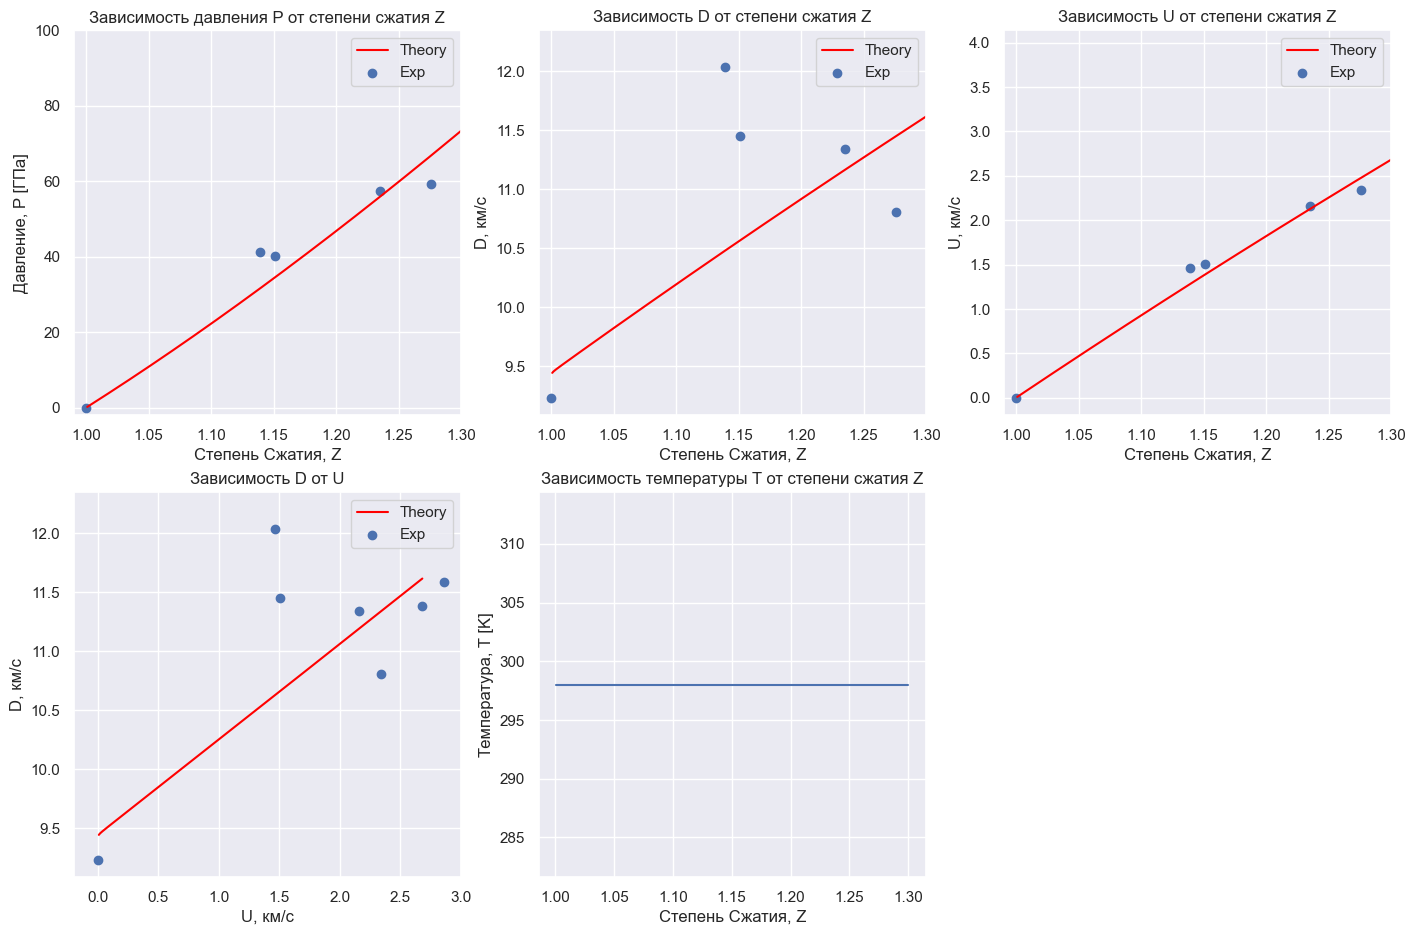

In [21]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
import pandas as pd


boron_data = pd.read_csv("D:\Git\RepoMALEKWHAT\MEPhI.-SCIENCE\data\BoronExp.txt", sep="\t")

def calc_CvEinst(T):
    R = 8.31
    return (3 * PhysicsConstant.R * (PhysicsConstant.teta/T)**(2) * math.exp(PhysicsConstant.teta/T)/(math.exp(PhysicsConstant.teta/T) - 1)**2)


def PdV(T, Z, V1=4.59/1000, P1=100): #V1 - литры, P1 - кПА, PdV - Дж
    V2 = V1/Z
    return 1/2*(V1-V2)*(P2(T,Z) + P1)


def P2(T, Z, V1=4.59/1000): # Б-М; K,K' - Па; P2 - кПа

    K = 210 * 10**9  # Pa
    K_ = 2.23
    eta = (1/Z)**(1/3)
    T1 = 298.15 # K
    gamma = 1.67
    

    V0_m3_mol = V1 / 1000.0 # Initial molar volume in m^3/mol
    V2_m3_mol = V0_m3_mol / Z # Current molar volume in m^3/mol

    # P_cold in Pa
    P_cold = 3 * K * (1-eta)/(eta**2) * np.exp(3/2 * (K_ - 1) * (1 - eta))
    
    # E_thermal_integral in J/mol
    # Add error handling for integration if T is very close to T1, quad might return 0 with some error.
    E_thermal_integral, _ = integrate.quad(calc_CvEinst, T1, T)
        
    P_thermal = gamma / V2_m3_mol * E_thermal_integral
    P_total_Pa = P_cold + P_thermal # Total pressure in Pa and P_thermal in Pa
    
    return (P_total_Pa / 1000.0) + 100.0 # Result in kPa

def Ecold(Z, V0_m3_mol=4.59/100000): # V0_m3_mol is initial molar volume in m^3/mol
    K = 210 * 10**9  # Pa
    K_ = 2.23
        
    eta = (1/Z)**(1/3)
    K_prime_minus_1 = K_ - 1
    


    exp_arg = (3.0/2.0) * K_prime_minus_1 * (1.0 - eta)
    exp_val = np.exp(exp_arg)
    
    denominator = K_prime_minus_1**2

    # Corrected coefficient: 4.0 instead of 9.0
    # This is based on E_cold = -Integral(P_cold dV) and the Vinet et al. 1986 paper's energy form
    # E(V0) + (4*K0*V0 / (K'0-1)^2) * [1 - (1 - (3/2)*(K'0-1)*(1-eta)) * exp((3/2)*(K'0-1)*(1-eta))]
    coeff = (4.0 * K * V0_m3_mol / denominator) 
    
    energy_term_in_bracket = 1.0 - (1.0 - exp_arg) * exp_val
    energy = coeff * energy_term_in_bracket
             
    return energy
    
#упругая энергия от степени сжатия

def dE(T,Z):
    T1 = 298.15
    return Ecold(Z) + (integrate.quad(calc_CvEinst, T1, T)[0])

# dE = PdV
def func(T,Z):
    # Ensure PdV uses the same V1 (initial molar volume in litres/mol) as the main script part
    # P1 is initial pressure in kPa
    val_dE = dE(T,Z)
    val_PdV = PdV(T,Z, V1=4.59/1000, P1=100.0) # Ensure V1 and P1 are consistent
    return val_dE - val_PdV

def res(Z, diff=0.1):
    left = 298.0
    right = 8000.0
    f_left = func(left, Z)
    f_right = func(right, Z)
    # если на концах нет смены знака, возвращаем начальное значение
    if f_left * f_right > 0:
        return left
    for _ in range(100):
        mid = (left + right) / 2
        f_mid = func(mid, Z)
        if abs(f_mid) < 1e-7 or (right - left) < diff:
            return mid
        if f_left * f_mid <= 0:
            right = mid
            f_right = f_mid
        else:
            left = mid
            f_left = f_mid
    return (left + right) / 2


T_values = []
Z_values = []
P2_values = []
D_values = []
U_values = []
V1 = 4.59/1000 # литров
P1 = 100 # Кпа
m = 10.81/1000 # Масса 1 моль при НУ (кг)

ZZ = np.arange(1.001, 1.3, 0.001) # Extended Z range to match data better if needed

for Z in ZZ:
    T2 = res(Z)
    T_values.append(T2)
    current_P2_kPa = P2(T2, Z, V1=4.59/1000) # V1 in litres/mol
    P2_values.append(current_P2_kPa / 1000000.0) # Convert kPa to GPa for plotting
    Z_values.append(Z)
    

    P2_minus_P1_kPa = current_P2_kPa - 100.0 # P1 is 100 kPa
    V1_main_litres_per_mol = 4.59/1000
    

    term_for_DU = (P2_minus_P1_kPa * 1000.0) * (V1_main_litres_per_mol / 1000.0 / m) / (1.0 - 1.0/Z)
# (Pa * m^3/kg) / dimensionless = J/kg
    D_val = np.sqrt(term_for_DU) / 1000.0 # km/s
    U_val = (Z-1.0)/Z * D_val # km/s

    D_values.append(D_val)
    U_values.append(U_val)


plt.figure(figsize=(17, 11))


plt.subplot(2, 3, 1)
plt.plot(Z_values, P2_values, color='red', label='Theory')
plt.scatter(boron_data["R/R0"], boron_data["P"], label="Exp")
plt.grid(True)
plt.legend()
plt.ylim(-2, 100)
plt.xlim(0.99, 1.3)
plt.tick_params(axis='x')
plt.tick_params(axis='y')
plt.title("Зависимость давления P от степени сжатия Z")
plt.xlabel('Степень Сжатия, Z')
plt.ylabel('Давление, P [ГПа]')

plt.subplot(2, 3, 2)
plt.plot(Z_values, D_values, color='red', label='Theory')
plt.scatter(boron_data["R/R0"], boron_data["D"], label="Exp")
plt.grid(True)
plt.legend()
plt.xlim(0.99, 1.3)
plt.title("Зависимость D от степени сжатия Z")
plt.xlabel('Степень Сжатия, Z')
plt.ylabel('D, км/с')

plt.subplot(2, 3, 3)
plt.plot(Z_values, U_values, color='red', label='Theory')
plt.scatter(boron_data["R/R0"], boron_data["U"], label="Exp")
plt.grid(True)
plt.legend()
plt.xlim(0.99, 1.3)
plt.title("Зависимость U от степени сжатия Z")
plt.xlabel('Степень Сжатия, Z')
plt.ylabel('U, км/с')


#d_exp = [9.231, 12.037, 11.453, 11.342, 10.805, 11.387, 11.591, 11.514, 11.577, 11.577, 11.739, 12.079, 12.051, 12.2]
#u_exp = [0, 1.465, 1.504, 2.16, 2.34, 2.677, 2.858, 3.124, 3.177, 3.482, 3.563, 3.749, 3.77, 3.942]
plt.subplot(2, 3, 4)
plt.plot(U_values, D_values, color='red', label='Theory')
plt.scatter(boron_data["U"], boron_data["D"], label="Exp")
plt.grid(True)
plt.legend()
plt.tick_params(axis='x')
plt.tick_params(axis='y')
plt.xlim(-0.2, 3)
plt.title("Зависимость D от U")
plt.xlabel('U, км/с')
plt.ylabel('D, км/с')

plt.subplot(2, 3, 5)
plt.plot(Z_values, T_values)
plt.grid(True)
plt.title("Зависимость температуры T от степени сжатия Z")
plt.xlabel('Степень Сжатия, Z')
plt.ylabel('Температура, T [K]')

In [29]:
T_values_Einst = T_values.copy()
Z_values_Einst = Z_values.copy()
P2_values_Einst = P2_values.copy()
D_values_Einst = D_values.copy()
U_values_Einst = U_values.copy()
print(P2_values_Einst[:3])

[nan, nan, nan]


<>:8: SyntaxWarning: invalid escape sequence '\G'
<>:8: SyntaxWarning: invalid escape sequence '\G'
C:\Temp\ipykernel_5284\3415048122.py:8: SyntaxWarning: invalid escape sequence '\G'
  boron_data = pd.read_csv("D:\Git\RepoMALEKWHAT\MEPhI.-SCIENCE\data\BoronExp.txt", sep="\t")


Text(0, 0.5, 'Температура, T [K]')

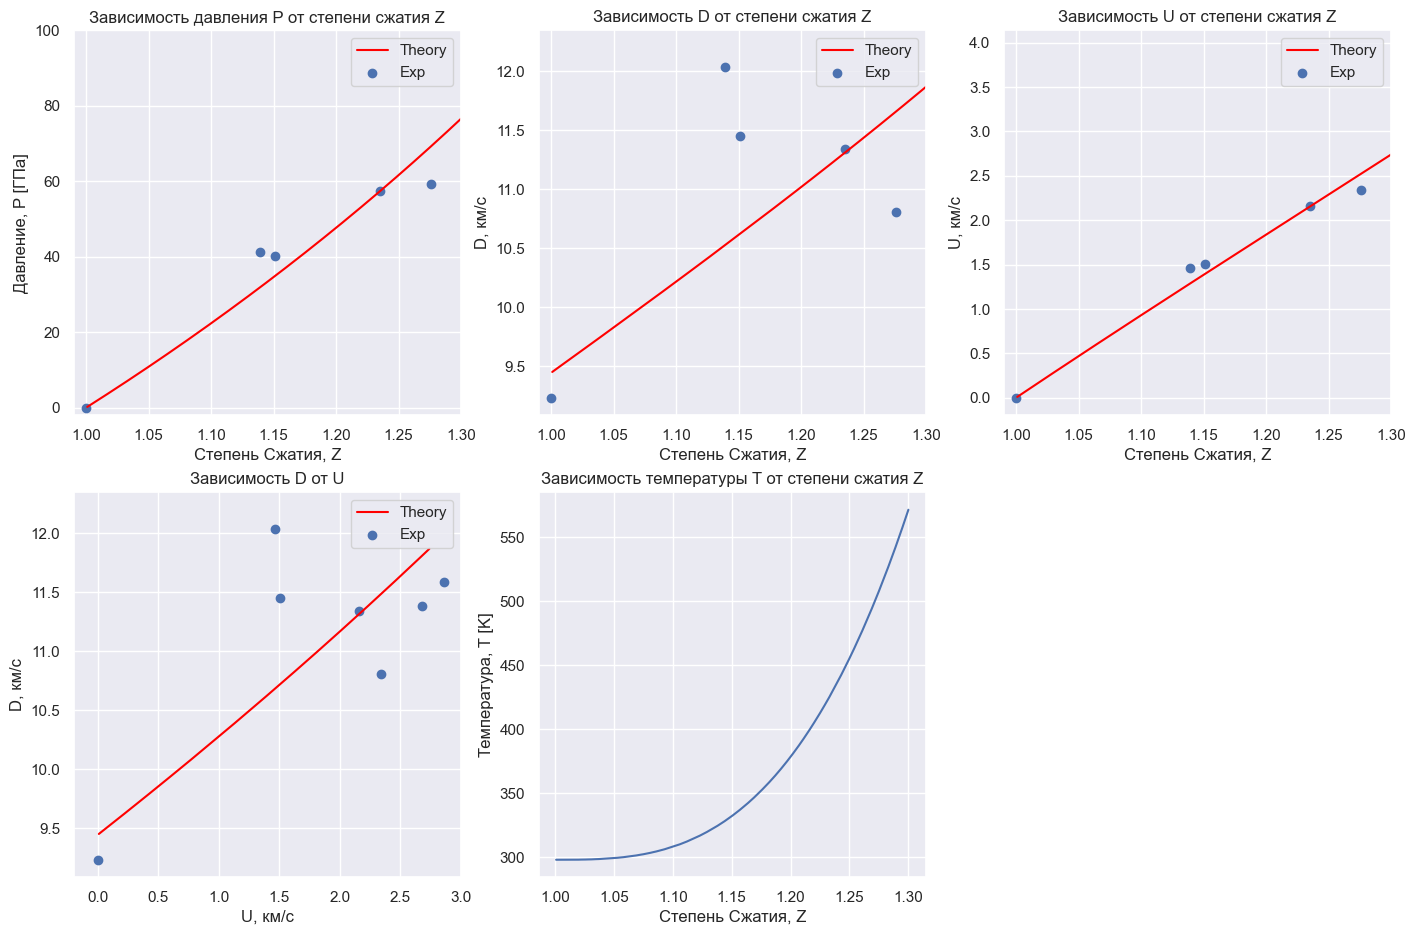

In [30]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
import pandas as pd


boron_data = pd.read_csv("D:\Git\RepoMALEKWHAT\MEPhI.-SCIENCE\data\BoronExp.txt", sep="\t")



def PdV(T, Z, V1=4.59/1000, P1=100): #V1 - литры, P1 - кПА, PdV - Дж
    V2 = V1/Z
    return 1/2*(V1-V2)*(P2(T,Z) + P1)


def P2(T, Z, V1=4.59/1000): # Б-М; K,K' - Па; P2 - кПа

    K = 210 * 10**9  # Pa
    K_ = 2.23
    eta = (1/Z)**(1/3)
    T1 = 298.15 # K
    gamma = 1.67
    Cv = 24.93
    # V1 is initial molar volume in litres/mol
    # V2 should be current molar volume in m^3/mol for P_thermal
    V0_m3_mol = V1 / 1000.0 # Initial molar volume in m^3/mol
    V2_m3_mol = V0_m3_mol / Z # Current molar volume in m^3/mol

    # P_cold in Pa
    P_cold = 3 * K * (1-eta)/(eta**2) * np.exp(3/2 * (K_ - 1) * (1 - eta))
    
    # E_thermal_integral in J/mol
    # Add error handling for integration if T is very close to T1, quad might return 0 with some error.
    if abs(T - T1) < 1e-6: # Avoid integration for T effectively equal to T1
        E_thermal_integral = 0.0
    else:
        E_thermal_integral = Cv * (T - T1)
        
    P_thermal = gamma / V2_m3_mol * E_thermal_integral
    P_total_Pa = P_cold + P_thermal # Total pressure in Pa and P_thermal in Pa
    
    return (P_total_Pa / 1000.0) + 100.0 # Result in kPa

def Ecold(Z, V0_m3_mol=4.59/1000000): # V0_m3_mol is initial molar volume in m^3/mol
    K = 210 * 10**9  # Pa
    K_ = 2.23
        
    eta = (1/Z)**(1/3)
    K_prime_minus_1 = K_ - 1
    
    exp_arg = (3.0/2.0) * K_prime_minus_1 * (1.0 - eta)
    exp_val = np.exp(exp_arg)
    
    denominator = K_prime_minus_1**2

    # Corrected coefficient: 4.0 instead of 9.0
    # This is based on E_cold = -Integral(P_cold dV) and the Vinet et al. 1986 paper's energy form
    # E(V0) + (4*K0*V0 / (K'0-1)^2) * [1 - (1 - (3/2)*(K'0-1)*(1-eta)) * exp((3/2)*(K'0-1)*(1-eta))]
    coeff = (4.0 * K * V0_m3_mol / denominator) 
    
    energy_term_in_bracket = 1.0 - (1.0 - exp_arg) * exp_val
    energy = coeff * energy_term_in_bracket
             
    return energy
    
#упругая энергия от степени сжатия

def dE(T,Z):
    T1 = 298.15
    Cv = 24.93
    return Ecold(Z) + Cv * (T - T1)
# dE = PdV
def func(T,Z):
    # Ensure PdV uses the same V1 (initial molar volume in litres/mol) as the main script part
    # P1 is initial pressure in kPa
    val_dE = dE(T,Z)
    val_PdV = PdV(T,Z, V1=4.59/1000, P1=100.0) # Ensure V1 and P1 are consistent
    return val_dE - val_PdV

def res(Z, diff = 0.1):  # Бинарный поиск температуры - reduced diff for precision
    left = 298.0
    right = 8000.0 # Increased upper bound slightly, just in case
    
    # Check initial function values
    f_left = func(left, Z)
    f_right = func(right, Z)

    if np.isnan(f_left) or np.isnan(f_right):
        print(f"Warning: NaN encountered in func for Z={Z} at bounds T_left={left:.2f}, T_right={right:.2f}. f_left={f_left}, f_right={f_right}")
        return np.nan # Return NaN if bounds evaluation fails

    if f_left * f_right > 1e-9: # Allow for f_left or f_right to be very close to zero
        # Check if one of them is already a root (within some tolerance)
        if abs(f_left) < 1e-7 : return left
        if abs(f_right) < 1e-7 : return right
        print(f"Out of bounds or no root for Z={Z:.4f}. f({left:.1f})={f_left:.3e}, f({right:.1f})={f_right:.3e}")
        return np.nan # Indicate failure to find a bracketing interval

    # Iterative search
    for _iteration in range(100): # Add max iterations to prevent infinite loops
        mid = (left + right) / 2
        if mid == left or mid == right or right - left < diff : # Convergence criteria
            break
        f_mid = func(mid, Z)
        if np.isnan(f_mid):
            print(f"Warning: NaN encountered in func for Z={Z:.4f} at T_mid={mid:.2f}. f_mid={f_mid}")
            # This often means T is too high or too low for CvEinst or other terms.
            # Try narrowing based on previous non-NaN values or stop.
            # If f_left and f_right were valid, this is problematic.
            # Let's assume if f_mid is NaN, the interval might be bad or T is extreme.
            # One strategy: if mid is problematic, try to shrink interval away from it if possible.
            # For now, simple break and return current estimate.
            break 

        if abs(f_mid) < 1e-7: # Found a root within tolerance
            return mid
        elif f_mid * f_left < 0: # Root in [left, mid] (note: f_left can be 0)
            right = mid
            # f_right = f_mid # Not needed for bisection logic here if f_left is fixed
        else: # Root in (mid, right]
            left = mid
            f_left = f_mid # Important to update f_left if it's part of the condition
            
    return (left + right) / 2


T_values = []
Z_values = []
P2_values = []
D_values = []
U_values = []
V1 = 4.59/1000 # литров
P1 = 100 # Кпа
m = 10.81/1000 # Масса 1 моль при НУ (кг)

ZZ = np.arange(1.001, 1.3, 0.001) # Extended Z range to match data better if needed

for Z in ZZ:
    T2 = res(Z)
    if np.isnan(T2):
        print(f"Failed to find T for Z={Z}. Skipping this point.")
        # Append NaN or skip for plotting robustness
        T_values.append(np.nan)
        P2_values.append(np.nan)
        Z_values.append(Z) # Still append Z to know where failure occurred
        D_values.append(np.nan)
        U_values.append(np.nan)
        continue

    T_values.append(T2)
    current_P2_kPa = P2(T2, Z, V1=4.59/1000) # V1 in litres/mol
    P2_values.append(current_P2_kPa / 1000000.0) # Convert kPa to GPa for plotting
    Z_values.append(Z)
    
    # D and U calculations
    # P2_calc is in kPa, P1 is in kPa. V1_main is litres/mol, m is kg/mol.
    # (kPa * litres/mol) / (kg/mol) = (10^3 N/m^2 * 10^-3 m^3) / kg = (N*m)/kg = J/kg
    # sqrt(J/kg) = sqrt(N*m/kg) = sqrt(kg*m/s^2 * m / kg) = sqrt(m^2/s^2) = m/s.
    # Division by 1000 to get km/s.
    P2_minus_P1_kPa = current_P2_kPa - 100.0 # P1 is 100 kPa
    V1_main_litres_per_mol = 4.59/1000
    
    if Z <= 1.0: # Avoid division by zero or sqrt of negative for (1-1/Z)
        D_val = np.nan # Or some appropriate initial value like D for Z slightly > 1
        U_val = np.nan
    else:
        term_for_DU = (P2_minus_P1_kPa * 1000.0) * (V1_main_litres_per_mol / 1000.0 / m) / (1.0 - 1.0/Z)
        # (Pa * m^3/kg) / dimensionless = J/kg
        if term_for_DU < 0:
             # This indicates P2 < P1, which might happen if T solver gives strange T
             # or if model is non-physical for some Z.
            print(f"Warning: Negative term for D^2 at Z={Z}, P2_kPa={current_P2_kPa:.2f}. Term={term_for_DU:.2e}")
            D_val = np.nan
            U_val = np.nan
        else:
            D_val = np.sqrt(term_for_DU) / 1000.0 # km/s
            U_val = (Z-1.0)/Z * D_val # km/s

    D_values.append(D_val)
    U_values.append(U_val)


plt.figure(figsize=(17, 11))


plt.subplot(2, 3, 1)
plt.plot(Z_values, P2_values, color='red', label='Theory')
plt.scatter(boron_data["R/R0"], boron_data["P"], label="Exp")
plt.grid(True)
plt.legend()
plt.ylim(-2, 100)
plt.xlim(0.99, 1.3)
plt.tick_params(axis='x')
plt.tick_params(axis='y')
plt.title("Зависимость давления P от степени сжатия Z")
plt.xlabel('Степень Сжатия, Z')
plt.ylabel('Давление, P [ГПа]')

plt.subplot(2, 3, 2)
plt.plot(Z_values, D_values, color='red', label='Theory')
plt.scatter(boron_data["R/R0"], boron_data["D"], label="Exp")
plt.grid(True)
plt.legend()
plt.xlim(0.99, 1.3)
plt.title("Зависимость D от степени сжатия Z")
plt.xlabel('Степень Сжатия, Z')
plt.ylabel('D, км/с')

plt.subplot(2, 3, 3)
plt.plot(Z_values, U_values, color='red', label='Theory')
plt.scatter(boron_data["R/R0"], boron_data["U"], label="Exp")
plt.grid(True)
plt.legend()
plt.xlim(0.99, 1.3)
plt.title("Зависимость U от степени сжатия Z")
plt.xlabel('Степень Сжатия, Z')
plt.ylabel('U, км/с')


#d_exp = [9.231, 12.037, 11.453, 11.342, 10.805, 11.387, 11.591, 11.514, 11.577, 11.577, 11.739, 12.079, 12.051, 12.2]
#u_exp = [0, 1.465, 1.504, 2.16, 2.34, 2.677, 2.858, 3.124, 3.177, 3.482, 3.563, 3.749, 3.77, 3.942]
plt.subplot(2, 3, 4)
plt.plot(U_values, D_values, color='red', label='Theory')
plt.scatter(boron_data["U"], boron_data["D"], label="Exp")
plt.grid(True)
plt.legend()
plt.tick_params(axis='x')
plt.tick_params(axis='y')
plt.xlim(-0.2, 3)
plt.title("Зависимость D от U")
plt.xlabel('U, км/с')
plt.ylabel('D, км/с')

plt.subplot(2, 3, 5)
plt.plot(Z_values, T_values)
plt.grid(True)
plt.title("Зависимость температуры T от степени сжатия Z")
plt.xlabel('Степень Сжатия, Z')
plt.ylabel('Температура, T [K]')

In [31]:
T_values_const = T_values.copy()
Z_values_const = Z_values.copy()
P2_values_const = P2_values.copy()
D_values_const = D_values.copy()
U_values_const = U_values.copy()
print(P2_values_const[:3])

[0.21020098576952512, 0.420588028915321, 0.6312327233465411]


<>:5: SyntaxWarning: invalid escape sequence '\G'
<>:5: SyntaxWarning: invalid escape sequence '\G'
C:\Temp\ipykernel_5284\2284431866.py:5: SyntaxWarning: invalid escape sequence '\G'
  boron_data = pd.read_csv("D:\Git\RepoMALEKWHAT\MEPhI.-SCIENCE\data\BoronExp.txt", sep="\t")


Text(0, 0.5, 'Температура, T [K]')

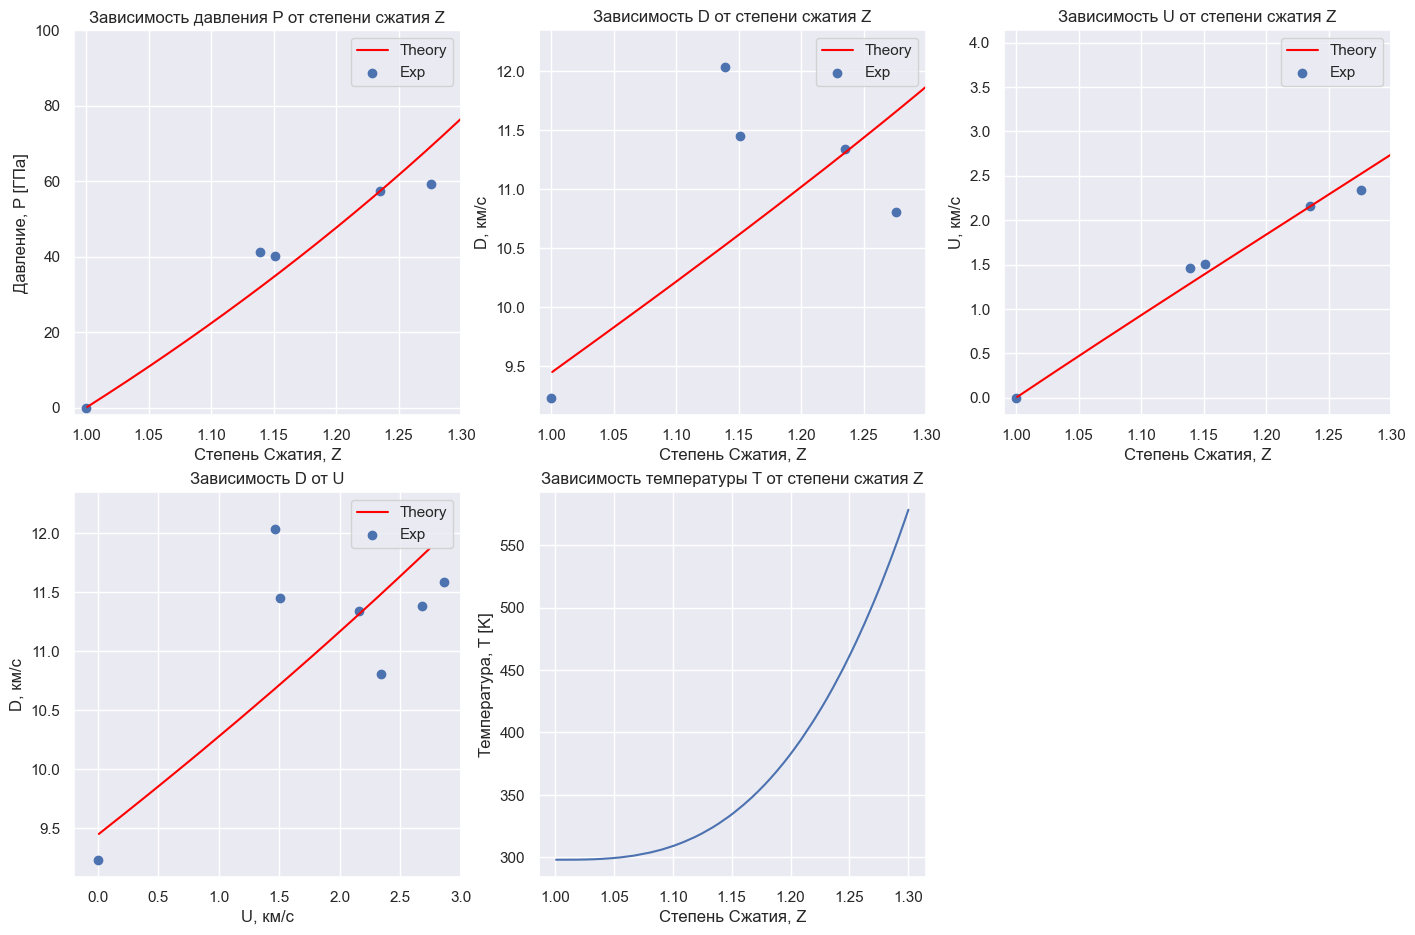

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

boron_data = pd.read_csv("D:\Git\RepoMALEKWHAT\MEPhI.-SCIENCE\data\BoronExp.txt", sep="\t")

def approx(T):
    return 24.93 * (1 - (math.exp(-(T - 199.90)/99.825))/5)


def PdV(T, Z, V1=4.59/1000, P1=100): #V1 - литры, P1 - кПА, PdV - Дж
    V2 = V1/Z
    return 1/2*(V1-V2)*(P2(T,Z) + P1)


def P2(T, Z, V1=4.59/1000): # Б-М; K,K' - Па; P2 - кПа

    K = 210 * 10**9  # Pa
    K_ = 2.23
    eta = (1/Z)**(1/3)
    T1 = 298.15 # K
    gamma = 1.67
    # V1 is initial molar volume in litres/mol
    # V2 should be current molar volume in m^3/mol for P_thermal
    V0_m3_mol = V1 / 1000.0 # Initial molar volume in m^3/mol
    V2_m3_mol = V0_m3_mol / Z # Current molar volume in m^3/mol

    # P_cold in Pa
    P_cold = 3 * K * (1-eta)/(eta**2) * np.exp(3/2 * (K_ - 1) * (1 - eta))
    
    # E_thermal_integral in J/mol
    # Add error handling for integration if T is very close to T1, quad might return 0 with some error.
    if abs(T - T1) < 1e-6: # Avoid integration for T effectively equal to T1
        E_thermal_integral = 0.0
    else:
        E_thermal_integral = (integrate.quad(approx, T1, T)[0])
        
    P_thermal = gamma / V2_m3_mol * E_thermal_integral
    P_total_Pa = P_cold + P_thermal # Total pressure in Pa and P_thermal in Pa
    
    return (P_total_Pa / 1000.0) + 100.0 # Result in kPa

def Ecold(Z, V0_m3_mol=4.59/1000000): # V0_m3_mol is initial molar volume in m^3/mol
    K = 210 * 10**9  # Pa
    K_ = 2.23
        
    eta = (1/Z)**(1/3)
    
    exp_arg = (3.0/2.0) * (K_ - 1) * (1.0 - eta)
    exp_val = np.exp(exp_arg)
    

    # Corrected coefficient: 4.0 instead of 9.0
    # This is based on E_cold = -Integral(P_cold dV) and the Vinet et al. 1986 paper's energy form
    # E(V0) + (4*K0*V0 / (K'0-1)^2) * [1 - (1 - (3/2)*(K'0-1)*(1-eta)) * exp((3/2)*(K'0-1)*(1-eta))]
    coeff = (4.0 * K * V0_m3_mol / (K_ - 1)**2) 
    
    energy_term_in_bracket = 1.0 - (1.0 - exp_arg) * exp_val
    energy = coeff * energy_term_in_bracket
             
    return energy
 
#упругая энергия от степени сжатия
def dE(T,Z):
    T1 = 298.15
    return Ecold(Z) + (integrate.quad(approx, T1, T)[0])

# dE = PdV
def func(T,Z):
    # Ensure PdV uses the same V1 (initial molar volume in litres/mol) as the main script part
    # P1 is initial pressure in kPa
    val_dE = dE(T,Z)
    val_PdV = PdV(T,Z, V1=4.59/1000, P1=100.0) # Ensure V1 and P1 are consistent
    return val_dE - val_PdV

def res(Z, diff = 0.1):  # дИХОТОМИЯ
    left = 298.0
    right = 8000.0
    
    f_left = func(left, Z)
    f_right = func(right, Z)

    # Iterative search
    for _iteration in range(100): # Add max iterations to prevent infinite loops
        mid = (left + right) / 2
        if mid == left or mid == right or right - left < diff : # Convergence criteria
            break
        f_mid = func(mid, Z)
        
        if abs(f_mid) < 1e-7: # Found a root within tolerance
            return mid
        elif f_mid * f_left < 0: # Root in [left, mid] (note: f_left can be 0)
            right = mid
            # f_right = f_mid # Not needed for bisection logic here if f_left is fixed
        else: # Root in (mid, right]
            left = mid
            f_left = f_mid
            
    return (left + right) / 2


T_values = []
Z_values = []
P2_values = []
D_values = []
U_values = []
V1 = 4.59/1000 # литров
P1 = 100 # Кпа
m = 10.81/1000 # Масса 1 моль при НУ (кг)

ZZ = np.arange(1.001, 1.3, 0.001) # Extended Z range to match data better if needed

for Z in ZZ:
    T2 = res(Z)
    if np.isnan(T2):
        print(f"Failed to find T for Z={Z}. Skipping this point.")
        # Append NaN or skip for plotting robustness
        T_values.append(np.nan)
        P2_values.append(np.nan)
        Z_values.append(Z) # Still append Z to know where failure occurred
        D_values.append(np.nan)
        U_values.append(np.nan)
        continue

    T_values.append(T2)
    current_P2_kPa = P2(T2, Z, V1=4.59/1000) # V1 in litres/mol
    P2_values.append(current_P2_kPa / 1000000.0) # Convert kPa to GPa for plotting
    Z_values.append(Z)
    
    # D and U calculations
    # P2_calc is in kPa, P1 is in kPa. V1_main is litres/mol, m is kg/mol.
    # (kPa * litres/mol) / (kg/mol) = (10^3 N/m^2 * 10^-3 m^3) / kg = (N*m)/kg = J/kg
    # sqrt(J/kg) = sqrt(N*m/kg) = sqrt(kg*m/s^2 * m / kg) = sqrt(m^2/s^2) = m/s.
    # Division by 1000 to get km/s.
    P2_minus_P1_kPa = current_P2_kPa - 100.0 # P1 is 100 kPa
    V1_main_litres_per_mol = 4.59/1000
    
    
    term_for_DU = (P2_minus_P1_kPa * 1000.0) * (V1_main_litres_per_mol / 1000.0 / m) / (1.0 - 1.0/Z)
 
    D_val = np.sqrt(term_for_DU) / 1000.0 # km/s
    U_val = (Z-1.0)/Z * D_val # km/s

    D_values.append(D_val)
    U_values.append(U_val)


plt.figure(figsize=(17, 11))


plt.subplot(2, 3, 1)
plt.plot(Z_values, P2_values, color='red', label='Theory')
plt.scatter(boron_data["R/R0"], boron_data["P"], label="Exp")
plt.grid(True)
plt.legend()
plt.ylim(-2, 100)
plt.xlim(0.99, 1.3)
plt.tick_params(axis='x')
plt.tick_params(axis='y')
plt.title("Зависимость давления P от степени сжатия Z")
plt.xlabel('Степень Сжатия, Z')
plt.ylabel('Давление, P [ГПа]')

plt.subplot(2, 3, 2)
plt.plot(Z_values, D_values, color='red', label='Theory')
plt.scatter(boron_data["R/R0"], boron_data["D"], label="Exp")
plt.grid(True)
plt.legend()
plt.xlim(0.99, 1.3)
plt.title("Зависимость D от степени сжатия Z")
plt.xlabel('Степень Сжатия, Z')
plt.ylabel('D, км/с')

plt.subplot(2, 3, 3)
plt.plot(Z_values, U_values, color='red', label='Theory')
plt.scatter(boron_data["R/R0"], boron_data["U"], label="Exp")
plt.grid(True)
plt.legend()
plt.xlim(0.99, 1.3)
plt.title("Зависимость U от степени сжатия Z")
plt.xlabel('Степень Сжатия, Z')
plt.ylabel('U, км/с')


#d_exp = [9.231, 12.037, 11.453, 11.342, 10.805, 11.387, 11.591, 11.514, 11.577, 11.577, 11.739, 12.079, 12.051, 12.2]
#u_exp = [0, 1.465, 1.504, 2.16, 2.34, 2.677, 2.858, 3.124, 3.177, 3.482, 3.563, 3.749, 3.77, 3.942]
plt.subplot(2, 3, 4)
plt.plot(U_values, D_values, color='red', label='Theory')
plt.scatter(boron_data["U"], boron_data["D"], label="Exp")
plt.grid(True)
plt.legend()
plt.tick_params(axis='x')
plt.tick_params(axis='y')
plt.xlim(-0.2, 3)
plt.title("Зависимость D от U")
plt.xlabel('U, км/с')
plt.ylabel('D, км/с')

plt.subplot(2, 3, 5)
plt.plot(Z_values, T_values)
plt.grid(True)
plt.title("Зависимость температуры T от степени сжатия Z")
plt.xlabel('Степень Сжатия, Z')
plt.ylabel('Температура, T [K]')

In [33]:
T_values_approx = T_values.copy()
Z_values_approx = Z_values.copy()
P2_values_approx = P2_values.copy()
D_values_approx = D_values.copy()
U_values_approx = U_values.copy()
print(P2_values_approx[:3])

[0.21020308691748443, 0.4205901321623292, 0.6312348286925984]


In [34]:
print(P2_values_approx[:4],"...")
print(P2_values_const[:4], "...")
print(P2_values_Einst[:4], "...")

[0.21020308691748443, 0.4205901321623292, 0.6312348286925984, 0.8421368530276968] ...
[0.21020098576952512, 0.420588028915321, 0.6312327233465411, 0.8421347455825907] ...
[nan, nan, nan, nan] ...


<>:9: SyntaxWarning: invalid escape sequence '\G'
<>:9: SyntaxWarning: invalid escape sequence '\G'
C:\Temp\ipykernel_7976\169277983.py:9: SyntaxWarning: invalid escape sequence '\G'
  self.boron_data = pd.read_csv("D:\Git\RepoMALEKWHAT\MEPhI.-SCIENCE\data\BoronExp.txt", sep="\t")


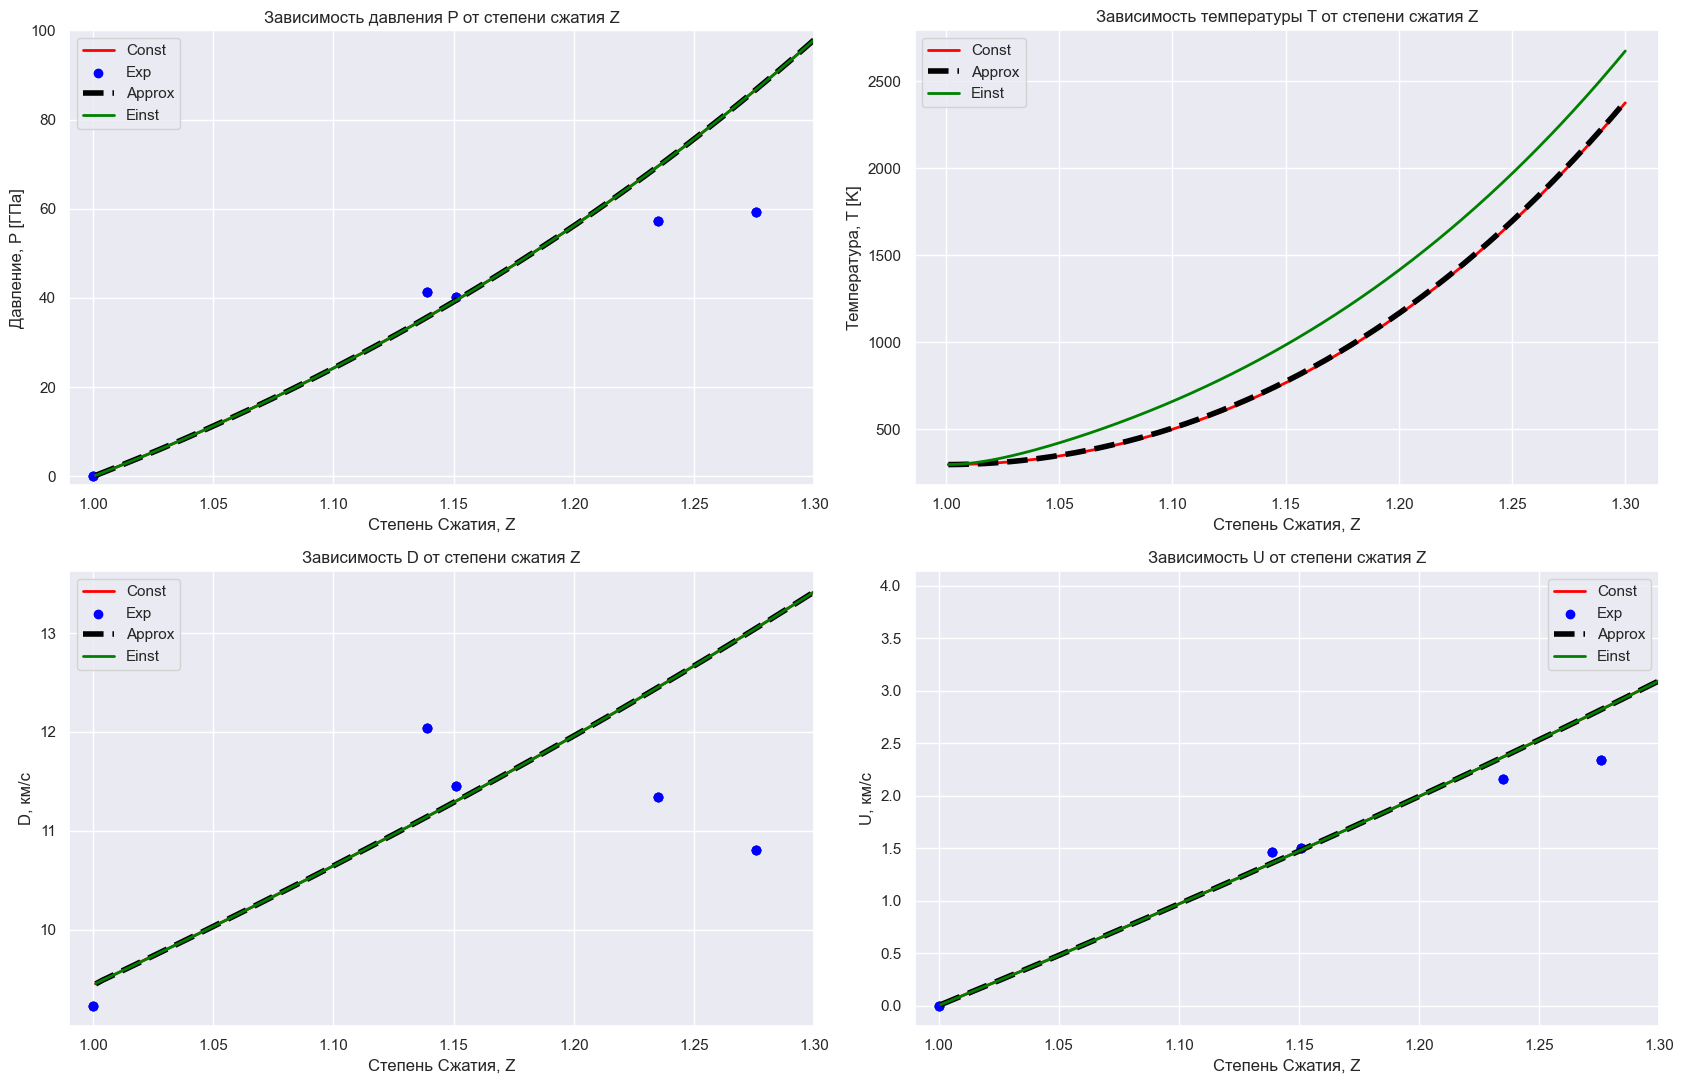

In [ ]:
plt.figure(figsize=(17, 11))
plt.subplot(2, 2, 1)
plt.plot(Z_values_approx, P2_values_approx, color='black', label='Aprox', linestyle="dashed", linewidth=4)
plt.plot(Z_values_const, P2_values_const, color="red", label="Const", linewidth=2)
plt.plot(Z_values_Einst, P2_values_Einst, color="green", label="Einst")
plt.scatter(boron_data["R/R0"], boron_data["P"], label="Exp")
plt.grid(True)
plt.legend()
plt.ylim(-2, 100)
plt.xlim(0.99, 1.3)
plt.tick_params(axis='x')
plt.tick_params(axis='y')
plt.title("Зависимость давления P от степени сжатия Z")
plt.xlabel('Степень Сжатия, Z')
plt.ylabel('Давление, P [ГПа]')

plt.subplot(2, 2, 2)
plt.plot(Z_values_approx, T_values_approx, color='black', label='Aprox', linestyle="dashed", linewidth=4)
plt.plot(Z_values_const, T_values_const, color="red", label="Const", linewidth=2)
plt.plot(Z_values_Einst, T_values_Einst, color="green", label="Einst")
plt.grid(True)
plt.legend()
plt.title("Зависимость температуры T от степени сжатия Z")
plt.xlabel('Степень Сжатия, Z')
plt.ylabel('Температура, T [K]')

plt.subplot(2, 2, 3)
plt.plot(Z_values_approx, D_values_approx, color='black', label='Aprox', linestyle="dashed", linewidth=4)
plt.plot(Z_values_const, D_values_const, color="red", label="Const", linewidth=2)
plt.plot(Z_values_Einst, D_values_Einst, color="green", label="Einst")
plt.scatter(boron_data["R/R0"], boron_data["D"], label="Exp")
plt.grid(True)
plt.legend()
plt.xlim(0.99, 1.3)
plt.title("Зависимость D от степени сжатия Z")
plt.xlabel('Степень Сжатия, Z')
plt.ylabel('D, км/с')

plt.subplot(2, 2, 4)
plt.plot(Z_values_approx, U_values_approx, color='black', label='Aprox', linestyle="dashed", linewidth=4)
plt.plot(Z_values_const, U_values_const, color="red", label="Const", linewidth=2)
plt.plot(Z_values_Einst, U_values_Einst, color="green", label="Einst")
plt.scatter(boron_data["R/R0"], boron_data["U"], label="Exp")
plt.grid(True)
plt.legend()
plt.xlim(0.99, 1.3)
plt.title("Зависимость U от степени сжатия Z")
plt.xlabel('Степень Сжатия, Z')
plt.ylabel('U, км/с')
plt.tight_layout()
plt.savefig("UAres")

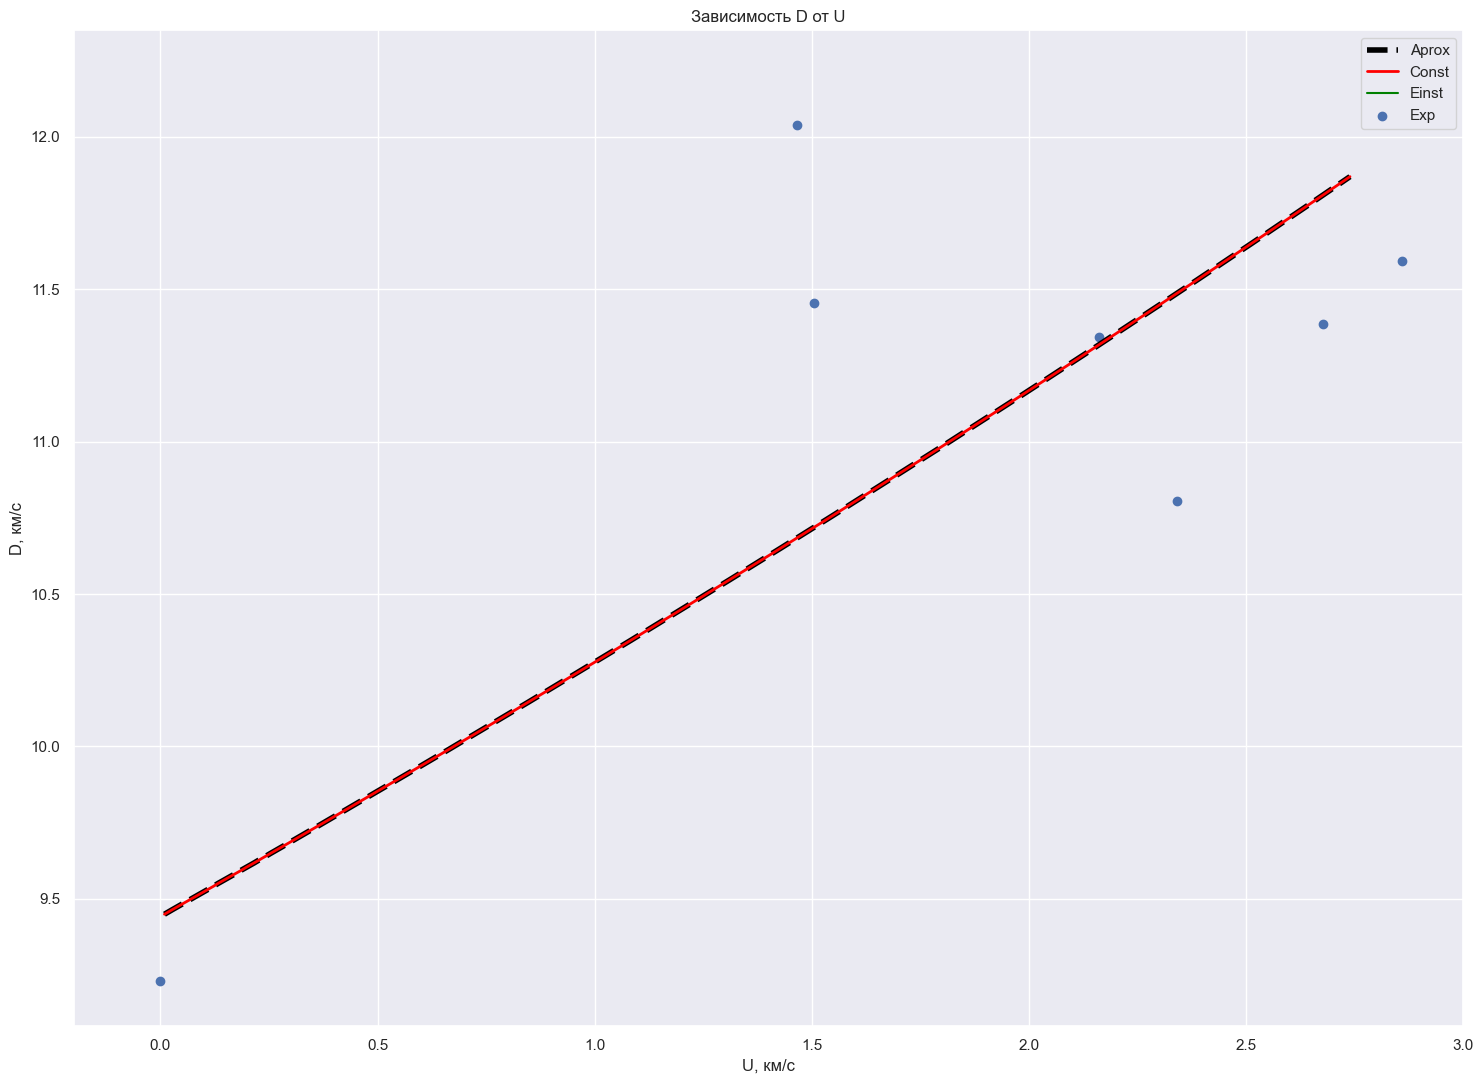

In [36]:
plt.figure(figsize=(15, 11))
plt.plot(U_values_approx, D_values_approx,  color='black', label='Aprox', linestyle="dashed", linewidth=4)
plt.plot(U_values_const, D_values_const, color="red", label="Const", linewidth=2)
plt.plot(U_values_Einst, D_values_Einst, color="green", label="Einst")
plt.scatter(boron_data["U"], boron_data["D"], label="Exp")
plt.grid(True)
plt.legend()
plt.tick_params(axis='x')
plt.tick_params(axis='y')
plt.xlim(-0.2, 3)
plt.title("Зависимость D от U")
plt.xlabel('U, км/с')
plt.ylabel('D, км/с')
plt.tight_layout()
plt.savefig("DUres")

In [37]:
import numpy as np
import math 
from tqdm import tqdm
import matplotlib.pyplot as plt

teta = 1250 
R = 8.31
gamma = 1.67
K = 210 * 10**9
K_ = 2.23

def calc_CvEinst(T):
    return(3 * R * (teta/T)**(2) * math.exp(teta/T)/(math.exp(teta/T) - 1)**2)

def isoBarical(Z, T):
    #V = V0 * Z
    # Z = V/V0
    V0 = 0.04 # метр в кубе/моль #2.34 это вообще плотность по идее
    eta = (1/Z)**(1/3)
    return 3 * K * (1-eta)/(eta**2) * np.exp(3/2 * (K_ - 1) * (1 - eta)) + calc_CvEinst(T) * gamma / (Z * V0)
def calculate_isobar(pressure):
    T_values = []
    z_values = []
    for T in tqdm(range(300, 1500)):
        T_values.append(T)
        l = 0.1
        r = 5000
        
        while l < r:
            mid = (l + r)/2.0
            if isoBarical(mid, T) > pressure:
                r = mid
            elif isoBarical(mid, T) < pressure:
                l = mid
            elif isoBarical(mid, T) == pressure:
                z_values.append(mid)
                break
        if isoBarical(mid, T) != pressure : # Если точное значение не найдено
            z_values.append(mid) # или l, или r в зависимости от логики
    plt.plot(T_values, z_values)

calculate_isobar(101325)


  0%|          | 0/1200 [00:53<?, ?it/s]


KeyboardInterrupt: 

100%|██████████| 1200/1200 [00:00<00:00, 2826.11it/s]


[6.659656259574092e-05, 6.675119597897166e-05, 6.690413431470052e-05, 6.705540754874372e-05, 6.720504484151893e-05, 6.73530745951657e-05, 6.749952447955523e-05, 6.764442145723802e-05, 6.778779180737785e-05, 6.792966114871719e-05, 6.807005446161813e-05, 6.820899610921908e-05, 6.834650985774791e-05, 6.84826188960286e-05, 6.861734585421747e-05, 6.875071282180293e-05, 6.888274136490203e-05, 6.901345254288412e-05, 6.914286692435169e-05, 6.927100460250664e-05, 6.939788520992871e-05, 6.952352793279151e-05, 6.964795152454128e-05, 6.977117431906077e-05, 6.989321424334089e-05, 7.001408882968156e-05, 7.013381522744115e-05, 7.025241021435415e-05, 7.036989020743567e-05, 7.04862712734896e-05, 7.060156913923746e-05, 7.071579920108379e-05, 7.082897653453301e-05, 7.094111590327274e-05, 7.105223176793608e-05, 7.116233829455809e-05, 7.127144936273677e-05, 7.137957857351194e-05, 7.148673925697322e-05, 7.159294447960752e-05, 7.169820705139699e-05, 7.180253953267722e-05, 7.190595424076522e-05, 7.20084632563

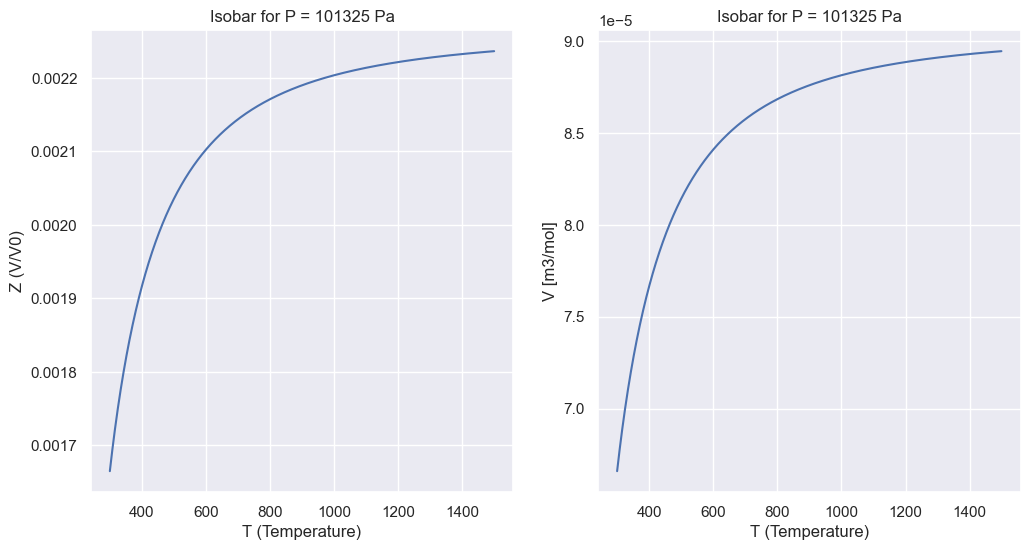

In [52]:
import numpy as np
import math 
from tqdm import tqdm
import matplotlib.pyplot as plt

teta = 1250 
R = 8.31
gamma = 1.67
K = 210 * 10**9
K_ = 2.23
V0 = 0.04
T_values = []
z_values = []
v_values = []
def calc_CvEinst(T):
    exp_term = math.exp(teta/T)
    return 3 * R * (teta/T)**2 * exp_term / (exp_term - 1)**2

def isoBarical(Z, T):
    #V = V0 * Z
    #Z = V/V0
    #V0 = 0.04 # метр в кубе/моль #2.34 это вообще плотность по идее

    eta = (1/Z)**(1/3)
    

    term1_exp_arg = 3/2 * (K_ - 1) * (1 - eta)
    exp_val = np.exp(term1_exp_arg)


    term1 = 3 * K * (1-eta)/(eta**2) * exp_val
    term2 = calc_CvEinst(T) * gamma / (Z * V0)
        
    return term1 + term2

def calculate_isobar(pressure):
    global T_values
    global v_values
    T_values = []
    z_values = []
    v_values = []


    # plt is not defined, so plotting is commented out.
    # import matplotlib.pyplot as plt # If you need plotting

    for T in tqdm(range(300, 1500)):
        T_values.append(T)
        
        low_z = 1e-6  # Lower bound for Z, must be > 0
        high_z = 1.3   # Upper bound for Z (as for Z>1, pressure -> inf)

            
        current_l_z = low_z
        current_r_z = high_z
        

        for _ in range(100):
            mid_z = (current_l_z + current_r_z) / 2.0
            if mid_z == current_l_z or mid_z == current_r_z: #от застревания
                break
            
            val_mid = isoBarical(mid_z, T)
            
            if val_mid > pressure: 
                current_l_z = mid_z
            else: 
                current_r_z = mid_z
                
        final_z = (current_l_z + current_r_z) / 2.0
        z_values.append(final_z)
        v_values = [x * V0 for x in z_values]

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(T_values, z_values)
    plt.xlabel("T (Temperature)")
    plt.ylabel("Z (V/V0)")
    plt.title(f"Isobar for P = {pressure} Pa")
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(T_values, v_values)
    plt.xlabel("T (Temperature)")
    plt.ylabel("V [m3/mol]")
    plt.title(f"Isobar for P = {pressure} Pa")
    plt.grid(True)

    

calculate_isobar(101325)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
class GradientDescentNonlinearRegression:
    def __init__(self, learning_rate=1, iterations=1500000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.X = np.array([])
        self.Y = np.array([])
        self.a0 = 0
        self.a1 = 0
        self.a2 = 0
        self.a3 = 0

    def plot_data(self):
        plt.figure(figsize=(12,7))

        plot_data = []
        for T in range(300, 1400):
            plot_data.append(self.a0 + self.a1 * T + self.a2 * T**2 + self.a3 * T**3)

        plt.scatter(self.X[::5], self.Y[::5], color='black', label='Exp data [26]')
        plt.plot(range(300, 1400), plot_data, label=f"Model {self.a0} + {self.a1}T + {self.a2}T^2 + {self.a3}T^3)")
        plt.xlabel('Температура (К)')
        plt.ylabel('Молярный объём')
        r2_score = self.calculate_r2()
        plt.title(f'Нелинейная регрессия с градиентным спуском (R² = {r2_score:.4f})')
        plt.legend()
        plt.tight_layout()

    def save_data(self):
        plt.savefig('descent.png')

    def generate_data(self, X, Y):
        self.X = np.array(X)
        self.Y = np.array(Y)

    def calculate_r2(self):
            y_pred = self.predict()
            ss_total = np.sum((self.Y - np.mean(self.Y)) ** 2)
            ss_residual = np.sum((self.Y - y_pred) ** 2)
            r2 = 1 - (ss_residual / ss_total)
            return r2
    
    def fit(self):
        self.a0 = 0
        self.a1 = 0
        self.a2 = 0
        self.a3 = 0

        n = self.X.shape[0]
        for _ in tqdm(range(self.iterations)):
            paretnles = (self.Y - (self.a0 + self.a1 * self.X + self.a2 * self.X**2 + self.a3 * self.X**3))
            a0_gradient = -2/n * np.sum(paretnles)
            a1_gradient = -2/n * np.sum(paretnles *  self.X)
            a2_gradient = -2/n * np.sum(paretnles * self.X**2)
            a3_gradient = -2/n * np.sum(paretnles * self.X**3)

            self.a0 -= self.learning_rate * a0_gradient
            self.a1 -= self.learning_rate * a1_gradient
            self.a2 -= self.learning_rate * a2_gradient
            self.a3 -= self.learning_rate * a3_gradient

        r2_score = self.calculate_r2()
        print(f"Оптимальные параметры: a0 = {self.a0}, a1 = {self.a1}, a2 = {self.a2}, a3 = {self.a3}")
        print(f"Коэффициент детерминации R² = {r2_score:.4f}")

    def predict(self):
        return (self.a0 + self.a1 * self.X + self.a2 * self.X**2 + self.a3 * self.X**3)
    

clf = GradientDescentNonlinearRegression()
clf.generate_data(T_values, v_values)
clf.fit()
clf.plot_data()


  0%|          | 0/1500000 [00:00<?, ?it/s]

C:\Temp\ipykernel_5284\2832041725.py:56: RuntimeWarning: overflow encountered in multiply
  a1_gradient = -2/n * np.sum(paretnles *  self.X)
C:\Temp\ipykernel_5284\2832041725.py:57: RuntimeWarning: overflow encountered in multiply
  a2_gradient = -2/n * np.sum(paretnles * self.X**2)
C:\Temp\ipykernel_5284\2832041725.py:58: RuntimeWarning: overflow encountered in multiply
  a3_gradient = -2/n * np.sum(paretnles * self.X**3)
  3%|▎         | 50071/1500000 [00:04<02:06, 11477.80it/s]


KeyboardInterrupt: 

100%|██████████| 1500000/1500000 [03:35<00:00, 6975.95it/s]


Оптимальные параметры: a0 = 8.810584245454249e-05, a1 = 1.512754336653297e-06, a2 = -2.6483753404805627e-06, a3 = 1.4938402915548876e-06
Среднее значение X (T_mean) для масштабирования: 899.5
Стандартное отклонение X (T_std) для масштабирования: 346.4100412324485
Коэффициент детерминации R² = 0.9850


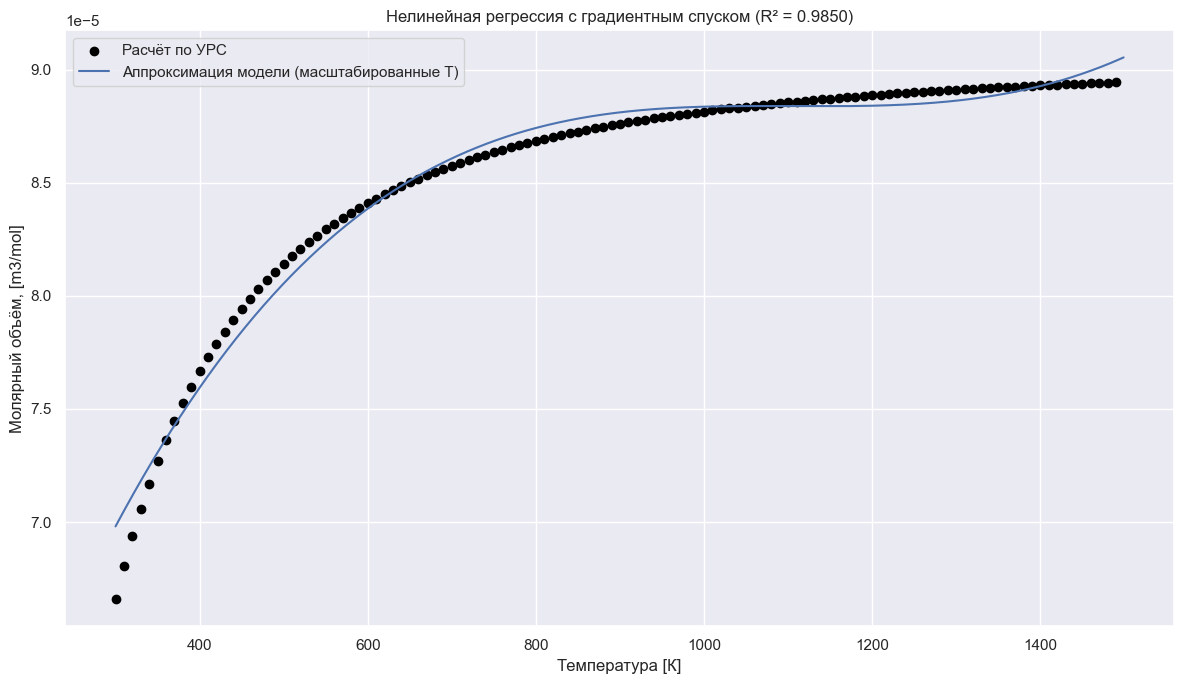

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
class GradientDescentNonlinearRegression:

    def __init__(self, learning_rate=0.001, iterations=1500000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.X = np.array([])
        self.Y = np.array([])
        self.a0 = 0
        self.a1 = 0
        self.a2 = 0
        self.a3 = 0
        self.X_mean = 0
        self.X_std = 1

    def plot_data(self):
        plt.figure(figsize=(12,7))
        plt.scatter(self.X[::10], self.Y[::10], color='black', label='Расчёт по УРС')

        plot_T_original_range = np.array(range(300, 1500), dtype=float)
        plot_T_scaled_range = (plot_T_original_range - self.X_mean) / self.X_std 
        
        model_Y_values = (self.a0 + self.a1 * plot_T_scaled_range + 
                        self.a2 * plot_T_scaled_range**2 + self.a3 * plot_T_scaled_range**3)
        plt.plot(plot_T_original_range, model_Y_values, label="Аппроксимация модели (масштабированные T)")
        
        plt.xlabel('Температура [К]')
        plt.ylabel('Молярный объём, [m3/mol]')
        r2_score = self.calculate_r2()
        plt.title(f'Нелинейная регрессия с градиентным спуском (R² = {r2_score:.4f})')
        plt.legend()
        plt.tight_layout()

    def save_data(self):
        plt.savefig('descent.png')

    def generate_data(self, X, Y):
        self.X = np.array(X)
        self.Y = np.array(Y)

    def calculate_r2(self):
            y_pred = self.predict()
            ss_total = np.sum((self.Y - np.mean(self.Y)) ** 2)
            ss_residual = np.sum((self.Y - y_pred) ** 2)
            r2 = 1 - (ss_residual / ss_total)
            return r2
    
    def fit(self):
        self.a0 = 0
        self.a1 = 0
        self.a2 = 0
        self.a3 = 0

        n = self.X.shape[0]
        self.X_mean = np.mean(self.X)
        self.X_std = np.std(self.X)
        X_scaled = (self.X - self.X_mean)/self.X_std

        for _ in tqdm(range(self.iterations)):
            paretnles = (self.Y - (self.a0 + self.a1 * X_scaled + self.a2 * X_scaled**2 + self.a3 * X_scaled**3))
            a0_gradient = -2/n * np.sum(paretnles)
            a1_gradient = -2/n * np.sum(paretnles *  X_scaled)
            a2_gradient = -2/n * np.sum(paretnles * X_scaled**2)
            a3_gradient = -2/n * np.sum(paretnles * X_scaled**3)

            self.a0 -= self.learning_rate * a0_gradient
            self.a1 -= self.learning_rate * a1_gradient
            self.a2 -= self.learning_rate * a2_gradient
            self.a3 -= self.learning_rate * a3_gradient

        r2_score = self.calculate_r2()
        print(f"Оптимальные параметры: a0 = {self.a0}, a1 = {self.a1}, a2 = {self.a2}, a3 = {self.a3}")
        print(f"Среднее значение X (T_mean) для масштабирования: {self.X_mean}")
        print(f"Стандартное отклонение X (T_std) для масштабирования: {self.X_std}")
        print(f"Коэффициент детерминации R² = {r2_score:.4f}")

    def predict(self): 
        X_data_for_pred = (self.X - self.X_mean) / self.X_std
        
        return (self.a0 + self.a1 * X_data_for_pred + 
                self.a2 * X_data_for_pred**2 + self.a3 * X_data_for_pred**3)
    

clf = GradientDescentNonlinearRegression()
clf.generate_data(T_values, v_values)
clf.fit()
clf.plot_data()


In [70]:
a0_s = 8.810584245454249e-05
a1_s = 1.512754336653297e-06
a2_s = -2.6483753404805627e-06
a3_s = 1.4938402915548876e-06
Tm = 899.5
Ts = 346.4100412324485

# ==Раскрываем полином V_m = a0_s + a1_s*T_s + a2_s*T_s^2 + a3_s*T_s^3
# где T_s = (T - Tm) / Ts = (1/Ts)*T - (Tm/Ts)
# Пусть k = 1/Ts и m = -Tm/Ts. Тогда T_s = k*T + m.
# V_m = a0_s + a1_s*(k*T + m) + a2_s*(k*T + m)^2 + a3_s*(k*T + m)^3
# V_m = a0_s + a1_s*k*T + a1_s*m + \
#       a2_s*(k^2*T^2 + 2*k*m*T + m^2) + \
#       a3_s*(k^3*T^3 + 3*k^2*m*T^2 + 3*k*m^2*T + m^3)

# Собираем коэффициенты при степенях T:
# T^3: a3_s * k^3
# T^2: a2_s * k^2 + a3_s * 3*k^2*m
# T^1: a1_s * k + a2_s * 2*k*m + a3_s * 3*k*m^2
# T^0: a0_s + a1_s*m + a2_s*m^2 + a3_s*m^3

k = 1/Ts
m = -Tm/Ts

c3 = a3_s * (k**3)
c2 = a2_s * (k**2) + a3_s * 3 * (k**2) * m
c1 = a1_s * k + a2_s * 2 * k * m + a3_s * 3 * k * (m**2)
c0 = a0_s + a1_s * m + a2_s * (m**2) + a3_s * (m**3)

print(f"c0 = {c0:.15e}") # Используем форматирование для лучшей читаемости
print(f"c1 = {c1:.15e}")
print(f"c2 = {c2:.15e}")
print(f"c3 = {c3:.15e}")

# Проверка (опционально): давайте подставим T=Tm (т.е. T_s=0)
# V_m(Tm) должно быть равно a0_s
# V_m_check_at_Tm = c0 + c1*Tm + c2*Tm**2 + c3*Tm**3
# print(f"Проверка: V_m при T=Tm: {V_m_check_at_Tm:.15e} (должно быть близко к a0_s = {a0_s:.15e})")

# Проверка (опционально): давайте подставим T = Tm + Ts (т.е. T_s=1)
# V_m(Tm+Ts) должно быть равно a0_s + a1_s + a2_s + a3_s
# T_check2 = Tm + Ts
# V_m_check_at_Tm_plus_Ts = c0 + c1*T_check2 + c2*T_check2**2 + c3*T_check2**3
# sum_a_s = a0_s + a1_s + a2_s + a3_s
# print(f"Проверка: V_m при T=Tm+Ts: {V_m_check_at_Tm_plus_Ts:.15e} (должно быть близко к sum(a_s) = {sum_a_s:.15e})")

c0 = 4.016719711438129e-05
c1 = 1.312986208735929e-07
c2 = -1.190437796526388e-10
c3 = 3.593624970256707e-14


Ошибка при создании объекта Cantera Solution: 
*******************************************************************************
InputFileError thrown by AnyValue::as:
Error on line 20 of input string:
Key 'data' contains a 'vector<AnyValue>',
not a 'vector<vector<double>>'
|  Line |
|    15 |     data:
|    16 |     - [-1.15931693E+00, 1.13777145E-02, -1.06985988E-05, 2.76106443E-09, 7.31746996E-13, -7.13339210E+01, 4.36439895E+00]
|    17 |     - [1.83494094E+00, 1.79198702E-03, -7.97879498E-07, 2.02764512E-10, -1.92028345E-14, -7.83202899E+02, -1.06433298E+01]
|    18 |     equation-of-state: molar-volume-temperature-polynomial
|    19 |     data: # Теперь data содержит список из двух элементов
>    20 >     - [4.016719711438129e-05, 1.312986208735929e-07, -1.190437796526388e-10, 3.593624970256707e-14] # 1. Список коэффициентов
              ^
|    21 |     - 300                               # 2. Минимальная температура
****************************************************************

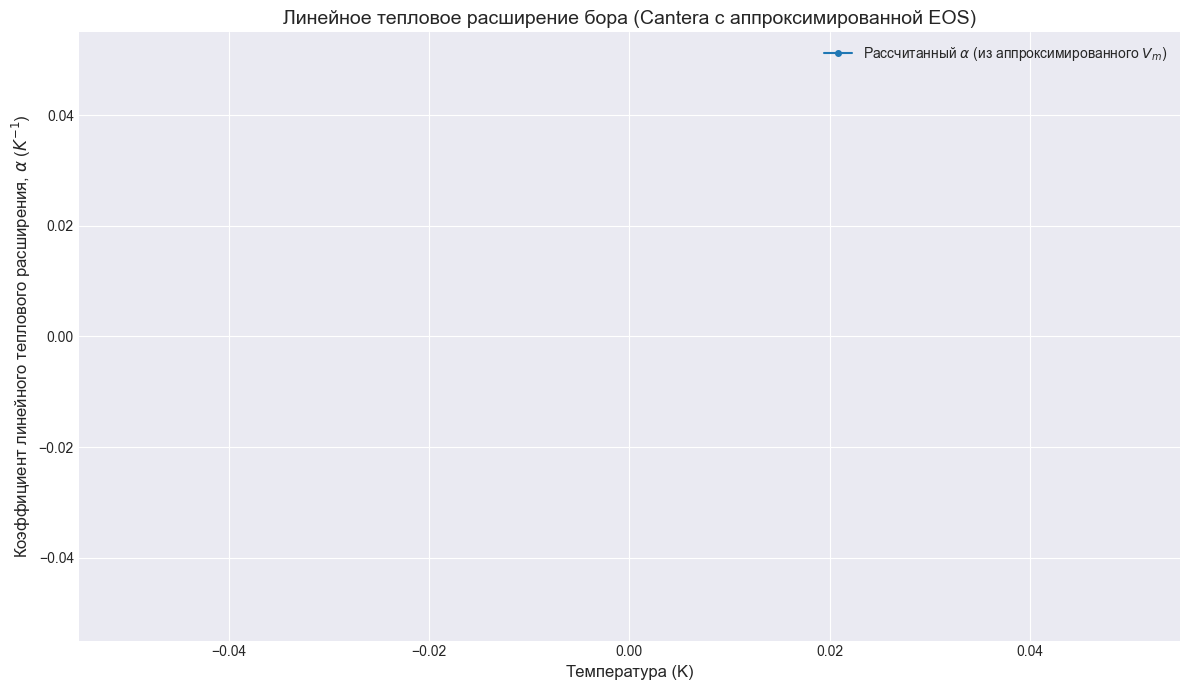


--- Пример рассчитанных значений ---
T (K) | V_m (m^3/mol) | Beta (1/K)  | Alpha (1/K)
---------------------------------------------------
300   | nan           | nan         | nan        
430   | nan           | nan         | nan        
560   | nan           | nan         | nan        
700   | nan           | nan         | nan        
830   | nan           | nan         | nan        
960   | nan           | nan         | nan        
1100  | nan           | nan         | nan        
1230  | nan           | nan         | nan        
1360  | nan           | nan         | nan        
1500  | nan           | nan         | nan        


: 

In [1]:
import cantera as ct
import matplotlib.pyplot as plt
import numpy as np

# Коэффициенты для полинома V_m(T) = c0 + c1*T + c2*T^2 + c3*T^3
c0 = 4.016719711438129e-05
c1 = 1.312986208735929e-07
c2 = -1.190437796526388e-10
c3 = 3.593624970256707e-14

# Формируем YAML-строку для Cantera
# Используем f-string для подстановки коэффициентов
new_yaml_coeffs = f"""
phases:
- name: boron_condensed_custom_eos
  thermo: fixed-stoichiometry
  elements: [B]
  species: [B(s)_custom]
  density: 2340 # Плотность, если нужна для других целей; V_m будет из полинома

species:
- name: B(s)_custom # Новое имя, чтобы не конфликтовать, если старый объект еще существует
  composition: {{B: 1}}
  thermo:
    model: NASA7 # Модель термодинамики для cp, h, s остается NASA7
    temperature-ranges: [200.0, 1000.0, 2350]
    data:
    - [-1.15931693E+00, 1.13777145E-02, -1.06985988E-05, 2.76106443E-09, 7.31746996E-13, -7.13339210E+01, 4.36439895E+00]
    - [1.83494094E+00, 1.79198702E-03, -7.97879498E-07, 2.02764512E-10, -1.92028345E-14, -7.83202899E+02, -1.06433298E+01]
    equation-of-state: molar-volume-temperature-polynomial
    equation-of-state: molar-volume-temperature-polynomial
    data: # Теперь data содержит список из двух элементов
    - [{c0:.15e}, {c1:.15e}, {c2:.15e}, {c3:.15e}] # 1. Список коэффициентов
    - {min_temp_eos}                               # 2. Минимальная температура
"""

# Создаем объект Solution в Cantera
try:
    boron_custom_eos = ct.Solution(yaml=new_yaml_coeffs)
except Exception as e:
    print(f"Ошибка при создании объекта Cantera Solution: {e}")
    print("--- YAML, который пытались использовать: ---")
    print(new_yaml_coeffs)
    print("-------------------------------------------")
    exit()

# Диапазон температур для расчета
temperatures = np.arange(300, 1501, 10) # Шаг 10 для более гладкого графика
beta_values = [] # Объемный коэффициент теплового расширения
alpha_values = [] # Линейный коэффициент теплового расширения
molar_volume_values = [] # Для проверки молярного объема

print("Начинаем расчет коэффициентов расширения...")
for T_val in temperatures:
    try:
        boron_custom_eos.TP = T_val, ct.one_atm
        current_beta = boron_custom_eos.thermalExpansionCoeff
        beta_values.append(current_beta)
        alpha_values.append(current_beta / 3.0)
        molar_volume_values.append(boron_custom_eos.volume_mole)
    except Exception as e:
        print(f"Ошибка при расчете для T={T_val} K: {e}")
        beta_values.append(np.nan) # Добавить NaN в случае ошибки для этой точки
        alpha_values.append(np.nan)
        molar_volume_values.append(np.nan)

print("Расчет завершен.")

# Визуализация коэффициента линейного теплового расширения
plt.style.use('seaborn-v0_8-darkgrid') # Стиль для графика
plt.figure(figsize=(12, 7))

plt.plot(temperatures, alpha_values, marker='o', linestyle='-', markersize=4, label=r'Рассчитанный $\alpha$ (из аппроксимированного $V_m$)')

plt.xlabel('Температура (K)', fontsize=12)
plt.ylabel(r'Коэффициент линейного теплового расширения, $\alpha$ ($K^{-1}$)', fontsize=12) # K^-1
plt.title('Линейное тепловое расширение бора (Cantera с аппроксимированной EOS)', fontsize=14)
plt.grid(True)
plt.legend(fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tight_layout()
plt.show()

# Опционально: График молярного объема для проверки
# plt.figure(figsize=(12, 7))
# plt.plot(temperatures, molar_volume_values, marker='.', linestyle='-', label=r'Молярный объём $V_m$ (из аппроксимированной EOS)')
# plt.xlabel('Температура (K)', fontsize=12)
# plt.ylabel(r'Молярный объём ($m^3/mol$)', fontsize=12)
# plt.title('Молярный объём бора (Cantera с аппроксимированной EOS)', fontsize=14)
# plt.grid(True)
# plt.legend(fontsize=10)
# plt.tick_params(axis='both', which='major', labelsize=10)
# plt.tight_layout()
# plt.show()

# Вывод нескольких значений для проверки
print("\n--- Пример рассчитанных значений ---")
print("T (K) | V_m (m^3/mol) | Beta (1/K)  | Alpha (1/K)")
print("---------------------------------------------------")
indices_to_print = np.linspace(0, len(temperatures) - 1, num=10, dtype=int) # Примерно 10 точек
for i in indices_to_print:
    if i < len(molar_volume_values) and i < len(beta_values) and i < len(alpha_values) :
         print(f"{temperatures[i]:<5.0f} | {molar_volume_values[i]:<13.6e} | {beta_values[i]:<11.4e} | {alpha_values[i]:<11.4e}")
